<h1>Data Science - Caso de Uso: League of Legends<h1/>

In [1]:
#Importando todas as bibliotecas necessárias
import pandas as pd
import numpy as np 
from pandas.plotting import scatter_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import metrics


import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
 

In [2]:
#Carregando o arquivo com a biblioteca do pandas que está guardado na variável pd
dataSetLOL = 'E://ESTUDANDO//TCC//_CAPITULO_4_LOL//LOL//LeagueOfLedends2017.xlsx'
lol = pd.read_excel(dataSetLOL, encoding='latin1')

#Função necessária para mostrar todas as linhas e colunas do dataset sem truncá-las
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#Exibe as 5 primeiras linhas do dataset para fins de verificação
lol.head()

,gameid,url,league,split,date,week,game,patchno,playerid,side,position,player,team,champion,ban1,ban2,ban3,ban4,ban5,gamelength,result,k,d,a,teamkills,teamdeaths,doubles,triples,quadras,pentas,fb,fbassist,fbvictim,fbtime,kpm,okpm,ckpm,fd,fdtime,teamdragkills,oppdragkills,elementals,oppelementals,firedrakes,waterdrakes,earthdrakes,airdrakes,elders,oppelders,herald,heraldtime,ft,fttime,firstmidouter,firsttothreetowers,teamtowerkills,opptowerkills,fbaron,fbarontime,teambaronkills,oppbaronkills,dmgtochamps,dmgtochampsperminute,dmgshare,earnedgoldshare,wards,wpm,wardshare,wardkills,wcpm,visionwards,visionwardbuys,visiblewardclearrate,invisiblewardclearrate,totalgold,earnedgpm,goldspent,gspd,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,oppgoldat10,gdat10,goldat15,oppgoldat15,gdat15,xpat10,oppxpat10,xpdat10,csat10,oppcsat10,csdat10,csat15,oppcsat15,csdat15
0,1002300127,http://matchhistory.na.leagueoflegends.com/en/...,NALCS,2017-2,42953.7,9.3,3,7.15,1,Blue,Top,Lourlo,Team Liquid,Gnar,LeBlanc,Zac,Shen,Tristana,Kog'Maw,25.383333,0,0,2,0,3,18,0,0,0,0,0,0.0,0,6.73213,0,0.118188,0.827315,0,11.9418,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,12.368267,0.0,0.0,4,10,0.0,21.536467,0.0,1.0,8725.0,343.729481,0.269631,0.239989,14.0,0.551543,0.184211,2.0,0.078792,5,5.0,,,9067.0,224.749048,9025.0,0.028090,231.0,4.0,3.0,0.0,9.258043,3378.0,3264.0,114.0,5542.0,5419.0,123.0,4669.0,4677.0,-8.0,94.0,89.0,5.0,150.0,136.0,14.0
1,1002300127,http://matchhistory.na.leagueoflegends.com/en/...,NALCS,2017-2,42953.7,9.3,3,7.15,2,Blue,Jungle,Dardoch,Team Liquid,Gragas,LeBlanc,Zac,Shen,Tristana,Kog'Maw,25.383333,0,0,5,1,3,18,0,0,0,0,0,1.0,0,6.73213,0,0.0787919,0.827315,0,11.9418,0,2,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,12.368267,0.0,0.0,4,10,0.0,21.536467,0.0,1.0,4300.0,169.402495,0.132884,0.176005,15.0,0.590939,0.197368,3.0,0.118188,5,6.0,,,7546.0,164.827840,6650.0,-0.241322,15.0,98.0,58.0,5.0,4.451740,2936.0,2883.0,53.0,4467.0,5223.0,-756.0,3134.0,3161.0,-27.0,47.0,47.0,0.0,62.0,79.0,-17.0
2,1002300127,http://matchhistory.na.leagueoflegends.com/en/...,NALCS,2017-2,42953.7,9.3,3,7.15,3,Blue,Middle,Mickey,Team Liquid,Ekko,LeBlanc,Zac,Shen,Tristana,Kog'Maw,25.383333,0,0,3,0,3,18,0,0,0,0,0,0.0,0,6.73213,0,0.315167,0.827315,0,11.9418,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,12.368267,0.0,0.0,4,10,0.0,21.536467,0.0,1.0,6698.0,263.873933,0.20699,0.257531,16.0,0.630335,0.210526,4.0,0.157584,6,6.0,,,9484.0,241.177150,8700.0,-0.171789,247.0,2.0,1.0,0.0,9.809586,3446.0,3468.0,-22.0,5236.0,6286.0,-1050.0,5088.0,5169.0,-81.0,93.0,92.0,1.0,142.0,143.0,-1.0
3,1002300127,http://matchhistory.na.leagueoflegends.com/en/...,NALCS,2017-2,42953.7,9.3,3,7.15,4,Blue,ADC,Piglet,Team Liquid,Vayne,LeBlanc,Zac,Shen,Tristana,Kog'Maw,25.383333,0,0,3,1,3,18,0,0,0,0,0,1.0,0,6.73213,0,0.157584,0.827315,0,11.9418,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,12.368267,0.0,0.0,4,10,0.0,21.536467,0.0,1.0,10367.0,408.417597,0.320375,0.197459,10.0,0.393959,0.131579,1.0,0.039396,2,3.0,,,8056.0,184.919764,8275.0,-0.191257,186.0,1.0,1.0,0.0,7.367039,2933.0,3287.0,-354.0,4578.0,5635.0,-1057.0,3141.0,2984.0,157.0,68.0,75.0,-7.0,112.0,128.0,-16.0
4,1002300127,http://matchhistory.na.leagueoflegends.com/en/...,NALCS,2017-2,42953.7,9.3,3,7.15,5,Blue,Support,Matt,Team Liquid,Lulu,LeBlanc,Zac,Shen,Tristana,Kog'Maw,25.383333,0,3,5,0,3,18,1,0,0,0,1,0.0,0,6.73213,0.118188,0.0393959,0.827315,0,11.9418,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,12.368267,0.0,0.0,4,10,0.0,21.536467,0.0,1.0,2269.0,89.389363,0.0701196,0.129016,21.0,0.827315,0.276316,8.0,0.315167,6,7.0,,,6429.0,120.822587,6880.0,-0.092862,12.0,0.0,0.0,0.0,0.472751,2256.0,2389.0,-133.0,3184.0,4298.0,-1114.0,2593.0,2816.0,-223.0,5.0,2.0,3.0,7.0,2.0,5.0


In [3]:
#Segundo a função shape, temos 37404 linhas e 98 colunas no dataset
lol.shape

(37404, 98)

<h1>Excluindo algumas colunas desnecessárias: </h1>

In [4]:
'''
Como a coluna 'url' não faz a mínima diferença na análise e só atrapalha a visão do dataset e 
 as colunas "herald" e "heraldtime" não são mais consideradas para vitórias, eu droparei as mesmas.. Novas 
colunas poderão ser excluídas posteriormente.
'''

lol.drop(['url','herald', 'heraldtime'], axis = 1, inplace = True)
lol.head()

,gameid,league,split,date,week,game,patchno,playerid,side,position,player,team,champion,ban1,ban2,ban3,ban4,ban5,gamelength,result,k,d,a,teamkills,teamdeaths,doubles,triples,quadras,pentas,fb,fbassist,fbvictim,fbtime,kpm,okpm,ckpm,fd,fdtime,teamdragkills,oppdragkills,elementals,oppelementals,firedrakes,waterdrakes,earthdrakes,airdrakes,elders,oppelders,ft,fttime,firstmidouter,firsttothreetowers,teamtowerkills,opptowerkills,fbaron,fbarontime,teambaronkills,oppbaronkills,dmgtochamps,dmgtochampsperminute,dmgshare,earnedgoldshare,wards,wpm,wardshare,wardkills,wcpm,visionwards,visionwardbuys,visiblewardclearrate,invisiblewardclearrate,totalgold,earnedgpm,goldspent,gspd,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,oppgoldat10,gdat10,goldat15,oppgoldat15,gdat15,xpat10,oppxpat10,xpdat10,csat10,oppcsat10,csdat10,csat15,oppcsat15,csdat15
0,1002300127,NALCS,2017-2,42953.7,9.3,3,7.15,1,Blue,Top,Lourlo,Team Liquid,Gnar,LeBlanc,Zac,Shen,Tristana,Kog'Maw,25.383333,0,0,2,0,3,18,0,0,0,0,0,0.0,0,6.73213,0,0.118188,0.827315,0,11.9418,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12.368267,0.0,0.0,4,10,0.0,21.536467,0.0,1.0,8725.0,343.729481,0.269631,0.239989,14.0,0.551543,0.184211,2.0,0.078792,5,5.0,,,9067.0,224.749048,9025.0,0.028090,231.0,4.0,3.0,0.0,9.258043,3378.0,3264.0,114.0,5542.0,5419.0,123.0,4669.0,4677.0,-8.0,94.0,89.0,5.0,150.0,136.0,14.0
1,1002300127,NALCS,2017-2,42953.7,9.3,3,7.15,2,Blue,Jungle,Dardoch,Team Liquid,Gragas,LeBlanc,Zac,Shen,Tristana,Kog'Maw,25.383333,0,0,5,1,3,18,0,0,0,0,0,1.0,0,6.73213,0,0.0787919,0.827315,0,11.9418,0,2,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12.368267,0.0,0.0,4,10,0.0,21.536467,0.0,1.0,4300.0,169.402495,0.132884,0.176005,15.0,0.590939,0.197368,3.0,0.118188,5,6.0,,,7546.0,164.827840,6650.0,-0.241322,15.0,98.0,58.0,5.0,4.451740,2936.0,2883.0,53.0,4467.0,5223.0,-756.0,3134.0,3161.0,-27.0,47.0,47.0,0.0,62.0,79.0,-17.0
2,1002300127,NALCS,2017-2,42953.7,9.3,3,7.15,3,Blue,Middle,Mickey,Team Liquid,Ekko,LeBlanc,Zac,Shen,Tristana,Kog'Maw,25.383333,0,0,3,0,3,18,0,0,0,0,0,0.0,0,6.73213,0,0.315167,0.827315,0,11.9418,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12.368267,0.0,0.0,4,10,0.0,21.536467,0.0,1.0,6698.0,263.873933,0.20699,0.257531,16.0,0.630335,0.210526,4.0,0.157584,6,6.0,,,9484.0,241.177150,8700.0,-0.171789,247.0,2.0,1.0,0.0,9.809586,3446.0,3468.0,-22.0,5236.0,6286.0,-1050.0,5088.0,5169.0,-81.0,93.0,92.0,1.0,142.0,143.0,-1.0
3,1002300127,NALCS,2017-2,42953.7,9.3,3,7.15,4,Blue,ADC,Piglet,Team Liquid,Vayne,LeBlanc,Zac,Shen,Tristana,Kog'Maw,25.383333,0,0,3,1,3,18,0,0,0,0,0,1.0,0,6.73213,0,0.157584,0.827315,0,11.9418,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12.368267,0.0,0.0,4,10,0.0,21.536467,0.0,1.0,10367.0,408.417597,0.320375,0.197459,10.0,0.393959,0.131579,1.0,0.039396,2,3.0,,,8056.0,184.919764,8275.0,-0.191257,186.0,1.0,1.0,0.0,7.367039,2933.0,3287.0,-354.0,4578.0,5635.0,-1057.0,3141.0,2984.0,157.0,68.0,75.0,-7.0,112.0,128.0,-16.0
4,1002300127,NALCS,2017-2,42953.7,9.3,3,7.15,5,Blue,Support,Matt,Team Liquid,Lulu,LeBlanc,Zac,Shen,Tristana,Kog'Maw,25.383333,0,3,5,0,3,18,1,0,0,0,1,0.0,0,6.73213,0.118188,0.0393959,0.827315,0,11.9418,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12.368267,0.0,0.0,4,10,0.0,21.536467,0.0,1.0,2269.0,89.389363,0.0701196,0.129016,21.0,0.827315,0.276316,8.0,0.315167,6,7.0,,,6429.0,120.822587,6880.0,-0.092862,12.0,0.0,0.0,0.0,0.472751,2256.0,2389.0,-133.0,3184.0,4298.0,-1114.0,2593.0,2816.0,-223.0,5.0,2.0,3.0,7.0,2.0,5.0


In [5]:
#Depois da exclusão de 3 colunas, temos 37404 linhas e 95 colunas
lol.shape

(37404, 95)

<h1>Chances de vitória: Variáveis de interesse</h1>
<p><h3>Queremos checar quais times venceram a partida - "result" = 1 na tabela -, usando como parâmetro, variáveis de interesse.</h3></p>
<p>As variáveis de interesse para a análise das chances de vitória para esse caso de uso são:</p> 
<ul>
    <li><b>side:          </b> Lado em que o time analisado começou na partida (Azul ou Vermelho).</li>
    <li><b>champion:      </b> Campeões escolhidos na partida pelo time.</li>
    <li><b>position:      </b> Posição em que os campeões jogam na partida.</li>
    <li><b>k:             </b> Quantidade de kills que o campeão obteve na partida.</li>
    <li><b>d:             </b> Quantidade de mortes que o campeão sofreu na partida.</li>
    <li><b>fd:            </b> Diz se o time foi quem matou o primeiro dragão da partida - fd = 1 na tabela.</li>
    <li><b>teamdragkills: </b> Diz quantos dragões foram mortos pelo time</li>
    <li><b>ft:            </b> Diz se o time foi o primeiro a ter uma torre destruída pelo oponente - ft = 1 na tabela.</li>
    <li><b>teamtowerkills:</b> Diz o total de torres inimigas destruídas pelo time.</li>
    <li><b>dmgtochamps:   </b> Total de dano que o time infligiu a campeões oponentes.</li>
    <li><b>totalgold:     </b> Diz o total de ouro ganho pelo time na partida.</li>
    <li><b>goldspent:     </b> Diz o total de ouro gasto pelo time na partida.</li>
</ul>
    <p>Entretando, para utilizar as variáveis para a criação de um modelo preditivo, é necessário primeiramente, trabalhá-las adequadamente.</p>

<h1>Criando funções de padronização:<h1>

In [6]:
'''
Aqui todos os campeões estão sendo adicionados em uma lista de palavras e as mesmas estão sendo limpas:
todos os caracteres minúsculos, eliminando todas os espaços em branco, eliminando todas as pontuações,
removendo todas as palavras duplicadas ( com o dict). No final, todas as palavras modificadas serão adicionados em 
uma lista de campeões. Essa limpeza será uma nova funcionalidade criada em uma função chamada "padronizar_campeoes"
'''
import string

def padronizar_campeoes(champions):
    #champions = [element.lower().translate
    #             (str.maketrans('', '', string.punctuation)).replace(' ', '').replace('-', '').strip('') for element in champions]
    champions = champions.lower().translate(str.maketrans('', '', string.punctuation)).replace(' ', '').replace('-', '').strip('')
    #champions = list(dict.fromkeys(champions))
    #len(champions)
    #sorted(champions)
    return champions

In [7]:
'''
Função criada para padronizar o transformar a palavra que refere-se ao lado da arena em valores números. Isso ocorre porque
para a utilização de modelos de Machine Learning, só números serão aceitos.
'''
def padronizar_lado_arena(lado):
    if lado == "Blue":
        return 1
    else:
        return 0

In [8]:
'''
Função criada para padronizar o transformar a palavra que refere-se as posições que os jogadores jogam em valores números. 
Isso ocorre porque para a utilização de modelos de Machine Learning, só números serão aceitos.
'''
def padronizar_posicao_partida(posicao):
    if posicao == "Middle":
        return 1
    elif posicao == "Support":
        return 2
    elif posicao == "ADC":
        return 3
    elif posicao == "Jungle":
        return 4
    elif posicao == "Top":
        return 5
    elif posicao == "Team":
        return 6
    

<h1>Aplicando as funções linha a linha:</h1>
<p>O objetivo agora é aplicar essas funções linha a linha, passando a variável que queremos alterar como parâmetro. Para fazer isso,
usarei o método "map", passando como argumento o nome da função e atribuindo isso a uma nova coluna que será criada com os 
dados alterados. As novas colunas criadas terão o mesmo nome da coluna original, mas o o 's' na frente de standard</p>

In [9]:
'''
Aplicando a função de padronização na coluna "champion". Uma nova coluna será criada e já padronizada, chamada "s_champion"
'''
lol["s_champion"] = lol["champion"].map(padronizar_campeoes)
lol.head()

,gameid,league,split,date,week,game,patchno,playerid,side,position,player,team,champion,ban1,ban2,ban3,ban4,ban5,gamelength,result,k,d,a,teamkills,teamdeaths,doubles,triples,quadras,pentas,fb,fbassist,fbvictim,fbtime,kpm,okpm,ckpm,fd,fdtime,teamdragkills,oppdragkills,elementals,oppelementals,firedrakes,waterdrakes,earthdrakes,airdrakes,elders,oppelders,ft,fttime,firstmidouter,firsttothreetowers,teamtowerkills,opptowerkills,fbaron,fbarontime,teambaronkills,oppbaronkills,dmgtochamps,dmgtochampsperminute,dmgshare,earnedgoldshare,wards,wpm,wardshare,wardkills,wcpm,visionwards,visionwardbuys,visiblewardclearrate,invisiblewardclearrate,totalgold,earnedgpm,goldspent,gspd,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,oppgoldat10,gdat10,goldat15,oppgoldat15,gdat15,xpat10,oppxpat10,xpdat10,csat10,oppcsat10,csdat10,csat15,oppcsat15,csdat15,s_champion
0,1002300127,NALCS,2017-2,42953.7,9.3,3,7.15,1,Blue,Top,Lourlo,Team Liquid,Gnar,LeBlanc,Zac,Shen,Tristana,Kog'Maw,25.383333,0,0,2,0,3,18,0,0,0,0,0,0.0,0,6.73213,0,0.118188,0.827315,0,11.9418,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12.368267,0.0,0.0,4,10,0.0,21.536467,0.0,1.0,8725.0,343.729481,0.269631,0.239989,14.0,0.551543,0.184211,2.0,0.078792,5,5.0,,,9067.0,224.749048,9025.0,0.028090,231.0,4.0,3.0,0.0,9.258043,3378.0,3264.0,114.0,5542.0,5419.0,123.0,4669.0,4677.0,-8.0,94.0,89.0,5.0,150.0,136.0,14.0,gnar
1,1002300127,NALCS,2017-2,42953.7,9.3,3,7.15,2,Blue,Jungle,Dardoch,Team Liquid,Gragas,LeBlanc,Zac,Shen,Tristana,Kog'Maw,25.383333,0,0,5,1,3,18,0,0,0,0,0,1.0,0,6.73213,0,0.0787919,0.827315,0,11.9418,0,2,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12.368267,0.0,0.0,4,10,0.0,21.536467,0.0,1.0,4300.0,169.402495,0.132884,0.176005,15.0,0.590939,0.197368,3.0,0.118188,5,6.0,,,7546.0,164.827840,6650.0,-0.241322,15.0,98.0,58.0,5.0,4.451740,2936.0,2883.0,53.0,4467.0,5223.0,-756.0,3134.0,3161.0,-27.0,47.0,47.0,0.0,62.0,79.0,-17.0,gragas
2,1002300127,NALCS,2017-2,42953.7,9.3,3,7.15,3,Blue,Middle,Mickey,Team Liquid,Ekko,LeBlanc,Zac,Shen,Tristana,Kog'Maw,25.383333,0,0,3,0,3,18,0,0,0,0,0,0.0,0,6.73213,0,0.315167,0.827315,0,11.9418,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12.368267,0.0,0.0,4,10,0.0,21.536467,0.0,1.0,6698.0,263.873933,0.20699,0.257531,16.0,0.630335,0.210526,4.0,0.157584,6,6.0,,,9484.0,241.177150,8700.0,-0.171789,247.0,2.0,1.0,0.0,9.809586,3446.0,3468.0,-22.0,5236.0,6286.0,-1050.0,5088.0,5169.0,-81.0,93.0,92.0,1.0,142.0,143.0,-1.0,ekko
3,1002300127,NALCS,2017-2,42953.7,9.3,3,7.15,4,Blue,ADC,Piglet,Team Liquid,Vayne,LeBlanc,Zac,Shen,Tristana,Kog'Maw,25.383333,0,0,3,1,3,18,0,0,0,0,0,1.0,0,6.73213,0,0.157584,0.827315,0,11.9418,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12.368267,0.0,0.0,4,10,0.0,21.536467,0.0,1.0,10367.0,408.417597,0.320375,0.197459,10.0,0.393959,0.131579,1.0,0.039396,2,3.0,,,8056.0,184.919764,8275.0,-0.191257,186.0,1.0,1.0,0.0,7.367039,2933.0,3287.0,-354.0,4578.0,5635.0,-1057.0,3141.0,2984.0,157.0,68.0,75.0,-7.0,112.0,128.0,-16.0,vayne
4,1002300127,NALCS,2017-2,42953.7,9.3,3,7.15,5,Blue,Support,Matt,Team Liquid,Lulu,LeBlanc,Zac,Shen,Tristana,Kog'Maw,25.383333,0,3,5,0,3,18,1,0,0,0,1,0.0,0,6.73213,0.118188,0.0393959,0.827315,0,11.9418,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12.368267,0.0,0.0,4,10,0.0,21.536467,0.0,1.0,2269.0,89.389363,0.0701196,0.129016,21.0,0.827315,0.276316,8.0,0.315167,6,7.0,,,6429.0,120.822587,6880.0,-0.092862,12.0,0.0,0.0,0.0,0.472751,2256.0,2389.0,-133.0,3184.0,4298.0,-1114.0,2593.0,2816.0,-223.0,5.0,2.0,3.0,7.0,2.0,5.0,lulu


In [10]:
lol.head(100)

,gameid,league,split,date,week,game,patchno,playerid,side,position,player,team,champion,ban1,ban2,ban3,ban4,ban5,gamelength,result,k,d,a,teamkills,teamdeaths,doubles,triples,quadras,pentas,fb,fbassist,fbvictim,fbtime,kpm,okpm,ckpm,fd,fdtime,teamdragkills,oppdragkills,elementals,oppelementals,firedrakes,waterdrakes,earthdrakes,airdrakes,elders,oppelders,ft,fttime,firstmidouter,firsttothreetowers,teamtowerkills,opptowerkills,fbaron,fbarontime,teambaronkills,oppbaronkills,dmgtochamps,dmgtochampsperminute,dmgshare,earnedgoldshare,wards,wpm,wardshare,wardkills,wcpm,visionwards,visionwardbuys,visiblewardclearrate,invisiblewardclearrate,totalgold,earnedgpm,goldspent,gspd,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,oppgoldat10,gdat10,goldat15,oppgoldat15,gdat15,xpat10,oppxpat10,xpdat10,csat10,oppcsat10,csdat10,csat15,oppcsat15,csdat15,s_champion
0,1002300127,NALCS,2017-2,42953.7,9.3,3,7.15,1,Blue,Top,Lourlo,Team Liquid,Gnar,LeBlanc,Zac,Shen,Tristana,Kog'Maw,25.383333,0,0,2,0,3,18,0,0,0,0,0,0.0,0,6.73213,0,0.118188,0.827315,0,11.941800,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12.368267,0.0,0.0,4,10,0.0,21.536467,0.0,1.0,8725.0,343.729481,0.269631,0.239989,14.0,0.551543,0.184211,2.0,0.078792,5,5.0,,,9067.0,224.749048,9025.0,0.028090,231.0,4.0,3.0,0.0,9.258043,3378.0,3264.0,114.0,5542.0,5419.0,123.0,4669.0,4677.0,-8.0,94.0,89.0,5.0,150.0,136.0,14.0,gnar
1,1002300127,NALCS,2017-2,42953.7,9.3,3,7.15,2,Blue,Jungle,Dardoch,Team Liquid,Gragas,LeBlanc,Zac,Shen,Tristana,Kog'Maw,25.383333,0,0,5,1,3,18,0,0,0,0,0,1.0,0,6.73213,0,0.0787919,0.827315,0,11.941800,0,2,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12.368267,0.0,0.0,4,10,0.0,21.536467,0.0,1.0,4300.0,169.402495,0.132884,0.176005,15.0,0.590939,0.197368,3.0,0.118188,5,6.0,,,7546.0,164.827840,6650.0,-0.241322,15.0,98.0,58.0,5.0,4.451740,2936.0,2883.0,53.0,4467.0,5223.0,-756.0,3134.0,3161.0,-27.0,47.0,47.0,0.0,62.0,79.0,-17.0,gragas
2,1002300127,NALCS,2017-2,42953.7,9.3,3,7.15,3,Blue,Middle,Mickey,Team Liquid,Ekko,LeBlanc,Zac,Shen,Tristana,Kog'Maw,25.383333,0,0,3,0,3,18,0,0,0,0,0,0.0,0,6.73213,0,0.315167,0.827315,0,11.941800,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12.368267,0.0,0.0,4,10,0.0,21.536467,0.0,1.0,6698.0,263.873933,0.20699,0.257531,16.0,0.630335,0.210526,4.0,0.157584,6,6.0,,,9484.0,241.177150,8700.0,-0.171789,247.0,2.0,1.0,0.0,9.809586,3446.0,3468.0,-22.0,5236.0,6286.0,-1050.0,5088.0,5169.0,-81.0,93.0,92.0,1.0,142.0,143.0,-1.0,ekko
3,1002300127,NALCS,2017-2,42953.7,9.3,3,7.15,4,Blue,ADC,Piglet,Team Liquid,Vayne,LeBlanc,Zac,Shen,Tristana,Kog'Maw,25.383333,0,0,3,1,3,18,0,0,0,0,0,1.0,0,6.73213,0,0.157584,0.827315,0,11.941800,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12.368267,0.0,0.0,4,10,0.0,21.536467,0.0,1.0,10367.0,408.417597,0.320375,0.197459,10.0,0.393959,0.131579,1.0,0.039396,2,3.0,,,8056.0,184.919764,8275.0,-0.191257,186.0,1.0,1.0,0.0,7.367039,2933.0,3287.0,-354.0,4578.0,5635.0,-1057.0,3141.0,2984.0,157.0,68.0,75.0,-7.0,112.0,128.0,-16.0,vayne
4,1002300127,NALCS,2017-2,42953.7,9.3,3,7.15,5,Blue,Support,Matt,Team Liquid,Lulu,LeBlanc,Zac,Shen,Tristana,Kog'Maw,25.383333,0,3,5,0,3,18,1,0,0,0,1,0.0,0,6.73213,0.118188,0.0393959,0.827315,0,11.941800,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12.368267,0.0,0.0,4,10,0.0,21.536467,0.0,1.0,2269.0,89.389363,0.0701196,0.129016,21.0,0.827315,0.276316,8.0,0.315167,6,7.0,,,6429.0,120.822587,6880.0,-0.092862,12.0,0.0,0.0,0.0,0.472751,2256.0,2389.0,-133.0,3184.0,4298.0,-1114.0,2593.0,2816.0,-223.0,5.0,2.0,3.0,7.0,2.0,5.0,lulu
5,1002300127,NALCS,2017-2,42953.7,9.3,3,7.15,6,Red,Top,Ssumday,Dignitas,Jarvan IV,Caitlyn,Kalista,Thresh,Blitzcrank,Bard,25.383333,1,3,0,9,18,3,0,0,0,0,0,0.0,0,6.73213,0.118188,0,0.827315,0,11.941800,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.368267,1.0,1.0,10,4,1.0,21.536467,1.0,0.0,7947.0,313.079448,0.145825,0.199594,14.0,0.551543,0.170732,6.0,0.236376,4,5.0,,,10941.0,298.577019,8775.0,-0.028090,223.0,11.0,2.0,0.0,9.218647,3264.0,3378.0,-114.0,5419.0,5542.0,-123.0,4677.0,4669.0,8.0,89.0,94.0,-5.0,

In [11]:
from collections import OrderedDict
len(list(OrderedDict.fromkeys(lol.s_champion)))

131

In [12]:
'''
Aplicando a função de padronização na coluna "side". Uma nova coluna será criada e já padronizada, chamada "s_side"
'''
lol["s_side"] = lol["side"].map(padronizar_lado_arena)
lol.head()

,gameid,league,split,date,week,game,patchno,playerid,side,position,player,team,champion,ban1,ban2,ban3,ban4,ban5,gamelength,result,k,d,a,teamkills,teamdeaths,doubles,triples,quadras,pentas,fb,fbassist,fbvictim,fbtime,kpm,okpm,ckpm,fd,fdtime,teamdragkills,oppdragkills,elementals,oppelementals,firedrakes,waterdrakes,earthdrakes,airdrakes,elders,oppelders,ft,fttime,firstmidouter,firsttothreetowers,teamtowerkills,opptowerkills,fbaron,fbarontime,teambaronkills,oppbaronkills,dmgtochamps,dmgtochampsperminute,dmgshare,earnedgoldshare,wards,wpm,wardshare,wardkills,wcpm,visionwards,visionwardbuys,visiblewardclearrate,invisiblewardclearrate,totalgold,earnedgpm,goldspent,gspd,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,oppgoldat10,gdat10,goldat15,oppgoldat15,gdat15,xpat10,oppxpat10,xpdat10,csat10,oppcsat10,csdat10,csat15,oppcsat15,csdat15,s_champion,s_side
0,1002300127,NALCS,2017-2,42953.7,9.3,3,7.15,1,Blue,Top,Lourlo,Team Liquid,Gnar,LeBlanc,Zac,Shen,Tristana,Kog'Maw,25.383333,0,0,2,0,3,18,0,0,0,0,0,0.0,0,6.73213,0,0.118188,0.827315,0,11.9418,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12.368267,0.0,0.0,4,10,0.0,21.536467,0.0,1.0,8725.0,343.729481,0.269631,0.239989,14.0,0.551543,0.184211,2.0,0.078792,5,5.0,,,9067.0,224.749048,9025.0,0.028090,231.0,4.0,3.0,0.0,9.258043,3378.0,3264.0,114.0,5542.0,5419.0,123.0,4669.0,4677.0,-8.0,94.0,89.0,5.0,150.0,136.0,14.0,gnar,1
1,1002300127,NALCS,2017-2,42953.7,9.3,3,7.15,2,Blue,Jungle,Dardoch,Team Liquid,Gragas,LeBlanc,Zac,Shen,Tristana,Kog'Maw,25.383333,0,0,5,1,3,18,0,0,0,0,0,1.0,0,6.73213,0,0.0787919,0.827315,0,11.9418,0,2,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12.368267,0.0,0.0,4,10,0.0,21.536467,0.0,1.0,4300.0,169.402495,0.132884,0.176005,15.0,0.590939,0.197368,3.0,0.118188,5,6.0,,,7546.0,164.827840,6650.0,-0.241322,15.0,98.0,58.0,5.0,4.451740,2936.0,2883.0,53.0,4467.0,5223.0,-756.0,3134.0,3161.0,-27.0,47.0,47.0,0.0,62.0,79.0,-17.0,gragas,1
2,1002300127,NALCS,2017-2,42953.7,9.3,3,7.15,3,Blue,Middle,Mickey,Team Liquid,Ekko,LeBlanc,Zac,Shen,Tristana,Kog'Maw,25.383333,0,0,3,0,3,18,0,0,0,0,0,0.0,0,6.73213,0,0.315167,0.827315,0,11.9418,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12.368267,0.0,0.0,4,10,0.0,21.536467,0.0,1.0,6698.0,263.873933,0.20699,0.257531,16.0,0.630335,0.210526,4.0,0.157584,6,6.0,,,9484.0,241.177150,8700.0,-0.171789,247.0,2.0,1.0,0.0,9.809586,3446.0,3468.0,-22.0,5236.0,6286.0,-1050.0,5088.0,5169.0,-81.0,93.0,92.0,1.0,142.0,143.0,-1.0,ekko,1
3,1002300127,NALCS,2017-2,42953.7,9.3,3,7.15,4,Blue,ADC,Piglet,Team Liquid,Vayne,LeBlanc,Zac,Shen,Tristana,Kog'Maw,25.383333,0,0,3,1,3,18,0,0,0,0,0,1.0,0,6.73213,0,0.157584,0.827315,0,11.9418,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12.368267,0.0,0.0,4,10,0.0,21.536467,0.0,1.0,10367.0,408.417597,0.320375,0.197459,10.0,0.393959,0.131579,1.0,0.039396,2,3.0,,,8056.0,184.919764,8275.0,-0.191257,186.0,1.0,1.0,0.0,7.367039,2933.0,3287.0,-354.0,4578.0,5635.0,-1057.0,3141.0,2984.0,157.0,68.0,75.0,-7.0,112.0,128.0,-16.0,vayne,1
4,1002300127,NALCS,2017-2,42953.7,9.3,3,7.15,5,Blue,Support,Matt,Team Liquid,Lulu,LeBlanc,Zac,Shen,Tristana,Kog'Maw,25.383333,0,3,5,0,3,18,1,0,0,0,1,0.0,0,6.73213,0.118188,0.0393959,0.827315,0,11.9418,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12.368267,0.0,0.0,4,10,0.0,21.536467,0.0,1.0,2269.0,89.389363,0.0701196,0.129016,21.0,0.827315,0.276316,8.0,0.315167,6,7.0,,,6429.0,120.822587,6880.0,-0.092862,12.0,0.0,0.0,0.0,0.472751,2256.0,2389.0,-133.0,3184.0,4298.0,-1114.0,2593.0,2816.0,-223.0,5.0,2.0,3.0,7.0,2.0,5.0,lulu,1


In [13]:
'''
Aplicando a função de padronização na coluna "position". Uma nova coluna será criada e já padronizada, chamada "s_position"
'''
lol["s_position"] = lol["position"].map(padronizar_posicao_partida)
lol.head()

,gameid,league,split,date,week,game,patchno,playerid,side,position,player,team,champion,ban1,ban2,ban3,ban4,ban5,gamelength,result,k,d,a,teamkills,teamdeaths,doubles,triples,quadras,pentas,fb,fbassist,fbvictim,fbtime,kpm,okpm,ckpm,fd,fdtime,teamdragkills,oppdragkills,elementals,oppelementals,firedrakes,waterdrakes,earthdrakes,airdrakes,elders,oppelders,ft,fttime,firstmidouter,firsttothreetowers,teamtowerkills,opptowerkills,fbaron,fbarontime,teambaronkills,oppbaronkills,dmgtochamps,dmgtochampsperminute,dmgshare,earnedgoldshare,wards,wpm,wardshare,wardkills,wcpm,visionwards,visionwardbuys,visiblewardclearrate,invisiblewardclearrate,totalgold,earnedgpm,goldspent,gspd,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,oppgoldat10,gdat10,goldat15,oppgoldat15,gdat15,xpat10,oppxpat10,xpdat10,csat10,oppcsat10,csdat10,csat15,oppcsat15,csdat15,s_champion,s_side,s_position
0,1002300127,NALCS,2017-2,42953.7,9.3,3,7.15,1,Blue,Top,Lourlo,Team Liquid,Gnar,LeBlanc,Zac,Shen,Tristana,Kog'Maw,25.383333,0,0,2,0,3,18,0,0,0,0,0,0.0,0,6.73213,0,0.118188,0.827315,0,11.9418,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12.368267,0.0,0.0,4,10,0.0,21.536467,0.0,1.0,8725.0,343.729481,0.269631,0.239989,14.0,0.551543,0.184211,2.0,0.078792,5,5.0,,,9067.0,224.749048,9025.0,0.028090,231.0,4.0,3.0,0.0,9.258043,3378.0,3264.0,114.0,5542.0,5419.0,123.0,4669.0,4677.0,-8.0,94.0,89.0,5.0,150.0,136.0,14.0,gnar,1,5
1,1002300127,NALCS,2017-2,42953.7,9.3,3,7.15,2,Blue,Jungle,Dardoch,Team Liquid,Gragas,LeBlanc,Zac,Shen,Tristana,Kog'Maw,25.383333,0,0,5,1,3,18,0,0,0,0,0,1.0,0,6.73213,0,0.0787919,0.827315,0,11.9418,0,2,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12.368267,0.0,0.0,4,10,0.0,21.536467,0.0,1.0,4300.0,169.402495,0.132884,0.176005,15.0,0.590939,0.197368,3.0,0.118188,5,6.0,,,7546.0,164.827840,6650.0,-0.241322,15.0,98.0,58.0,5.0,4.451740,2936.0,2883.0,53.0,4467.0,5223.0,-756.0,3134.0,3161.0,-27.0,47.0,47.0,0.0,62.0,79.0,-17.0,gragas,1,4
2,1002300127,NALCS,2017-2,42953.7,9.3,3,7.15,3,Blue,Middle,Mickey,Team Liquid,Ekko,LeBlanc,Zac,Shen,Tristana,Kog'Maw,25.383333,0,0,3,0,3,18,0,0,0,0,0,0.0,0,6.73213,0,0.315167,0.827315,0,11.9418,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12.368267,0.0,0.0,4,10,0.0,21.536467,0.0,1.0,6698.0,263.873933,0.20699,0.257531,16.0,0.630335,0.210526,4.0,0.157584,6,6.0,,,9484.0,241.177150,8700.0,-0.171789,247.0,2.0,1.0,0.0,9.809586,3446.0,3468.0,-22.0,5236.0,6286.0,-1050.0,5088.0,5169.0,-81.0,93.0,92.0,1.0,142.0,143.0,-1.0,ekko,1,1
3,1002300127,NALCS,2017-2,42953.7,9.3,3,7.15,4,Blue,ADC,Piglet,Team Liquid,Vayne,LeBlanc,Zac,Shen,Tristana,Kog'Maw,25.383333,0,0,3,1,3,18,0,0,0,0,0,1.0,0,6.73213,0,0.157584,0.827315,0,11.9418,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12.368267,0.0,0.0,4,10,0.0,21.536467,0.0,1.0,10367.0,408.417597,0.320375,0.197459,10.0,0.393959,0.131579,1.0,0.039396,2,3.0,,,8056.0,184.919764,8275.0,-0.191257,186.0,1.0,1.0,0.0,7.367039,2933.0,3287.0,-354.0,4578.0,5635.0,-1057.0,3141.0,2984.0,157.0,68.0,75.0,-7.0,112.0,128.0,-16.0,vayne,1,3
4,1002300127,NALCS,2017-2,42953.7,9.3,3,7.15,5,Blue,Support,Matt,Team Liquid,Lulu,LeBlanc,Zac,Shen,Tristana,Kog'Maw,25.383333,0,3,5,0,3,18,1,0,0,0,1,0.0,0,6.73213,0.118188,0.0393959,0.827315,0,11.9418,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12.368267,0.0,0.0,4,10,0.0,21.536467,0.0,1.0,2269.0,89.389363,0.0701196,0.129016,21.0,0.827315,0.276316,8.0,0.315167,6,7.0,,,6429.0,120.822587,6880.0,-0.092862,12.0,0.0,0.0,0.0,0.472751,2256.0,2389.0,-133.0,3184.0,4298.0,-1114.0,2593.0,2816.0,-223.0,5.0,2.0,3.0,7.0,2.0,5.0,lulu,1,2


In [14]:
'''
3 novas colunas foram criadas para que possam ser padronizadas:
s_side, s_position, s_champion
'''
lol.shape

(37404, 98)

<h1>Trabalhando com valores nulos:</h1>
    <p>Importante dizer que existem muitas maneiras de se trabalhar em cima de dados nulos em datasets.
Escolhi a deleção, simplesmente porque não quero enviesar a análise com valores falsos e também porque, das 37404 linhas que
temos disponíveis no dataset, excluírei no máximo 11959 linhas. O que gera uma perda de quase 32% das informações. Mas pelo menos essas informações estão corretas</p> 

<h3><p>Existem muitas colunas com valores nulos, mas nem todas me interessam. Conforme irei trabalhando
com o dataset, irei excluindo as linhas que apresentam valores nulos conforme a necessidade e o impacto negativo
    causado na análise.</p></h3>

In [15]:
#Verificando a quantidade de dados nulos em cada coluna
lol.isnull().sum()

gameid                        0
league                        0
split                         0
date                          0
week                          0
game                          0
patchno                       0
playerid                      0
side                          0
position                      0
player                        0
team                          0
champion                      0
ban1                        120
ban2                         30
ban3                         96
ban4                        102
ban5                        270
gamelength                    0
result                        0
k                             0
d                             0
a                             0
teamkills                     0
teamdeaths                    0
doubles                       0
triples                       0
quadras                       0
pentas                        0
fb                            0
fbassist                   5508
fbvictim

In [16]:
'''
Algumas linhas apresentam valores vazios, mas não nulos. Portanto, aplicar o método de excluir valores nulos não irá funcionar.
Para sanar esse problema, usarei um método chamado "replace", para substituir todos os valores com espaços vazios do dataset
em valores nulos. E nos passos seguintes, irei excluir todos os valores nulos.
'''
lol.replace('', np.nan, inplace=True)
lol.isnull().sum()

gameid                        0
league                        0
split                         0
date                          0
week                          0
game                          0
patchno                       0
playerid                      0
side                          0
position                      0
player                        0
team                          0
champion                      0
ban1                        120
ban2                         30
ban3                         96
ban4                        102
ban5                        270
gamelength                    0
result                        0
k                             0
d                             0
a                             0
teamkills                     0
teamdeaths                    0
doubles                       0
triples                       0
quadras                       0
pentas                        0
fb                            0
fbassist                   5508
fbvictim

In [17]:
'''
       As linhas deletadas, pertencem as colunas "ft", "teamtowerkills", "dmgtochamps",
"goldspent", "totalgold", "s_champion", "s_side", "s_position". Essas colunas foram selecionadas porque são atributos que foram escolhidos como determinantes
para a vitória. 
       w_lol será o nome da nova variável que receberá todo o dataset com as colunas escolhidas já sem seus valores nulos.
       
'''
w_lol = lol.dropna(axis=0, how='any', thresh=None, subset= [ "ft", "teamtowerkills", "dmgtochamps", "goldspent", 
                                    "totalgold", "s_champion", "s_side", "s_position"], inplace=False).copy()




In [18]:
#Conferindo se resta algum valor nulo nas colunas de interesse.
w_lol.isnull().sum()

gameid                        0
league                        0
split                         0
date                          0
week                          0
game                          0
patchno                       0
playerid                      0
side                          0
position                      0
player                        0
team                          0
champion                      0
ban1                         95
ban2                         20
ban3                         65
ban4                         80
ban5                        175
gamelength                    0
result                        0
k                             0
d                             0
a                             0
teamkills                     0
teamdeaths                    0
doubles                       0
triples                       0
quadras                       0
pentas                        0
fb                            0
fbassist                      0
fbvictim

In [19]:
#Conferindo qual é o tamanho do novo dataframe
w_lol.shape

(25830, 98)

<h1>Alterando os tipos das variáveis</h1>
<p>Algumas variáveis de interesse, apresentam tipos indesejados. Algumas são do tipo "string" por exemplo. Para facilitar a análise e posteriormente aplicar técnicas de Machine Learning, todas as variáveis devem ser padronizadas em um tipo somente: um tipo número. Portanto abaixo, algumas variáveis de interesse terão o seu tipo alterado.</p>

In [20]:
#Conferindo o tipo de cada coluna. Alguns tipos provavelmente serão alterados.
w_lol.dtypes

gameid                      object
league                      object
split                       object
date                        object
week                        object
game                        object
patchno                    float64
playerid                     int64
side                        object
position                    object
player                      object
team                        object
champion                    object
ban1                        object
ban2                        object
ban3                        object
ban4                        object
ban5                        object
gamelength                 float64
result                       int64
k                            int64
d                            int64
a                            int64
teamkills                    int64
teamdeaths                   int64
doubles                     object
triples                     object
quadras                     object
pentas              

In [21]:
#Mudar o "fd", "ft" para inteiros. Pois eles apresentam apenas os valores 0 ou 1.
w_lol['fd'] = w_lol['fd'].astype(float)
w_lol['ft'] = w_lol['ft'].astype(float)

In [22]:
#Conferindo o resultado da conversão de tipos
w_lol.dtypes

gameid                      object
league                      object
split                       object
date                        object
week                        object
game                        object
patchno                    float64
playerid                     int64
side                        object
position                    object
player                      object
team                        object
champion                    object
ban1                        object
ban2                        object
ban3                        object
ban4                        object
ban5                        object
gamelength                 float64
result                       int64
k                            int64
d                            int64
a                            int64
teamkills                    int64
teamdeaths                   int64
doubles                     object
triples                     object
quadras                     object
pentas              

<h1>Machine Learning:</h1>
<p>Após carregar os dados e limpá-los, é hora de preparar o terreno para prever as chances de vitória. Para isso, utilizaremos de técnicas de <b>Machine Learning.</b></p>

<h3>Criando um novo dataframe</h3>
<p>Para facilitar na utilização dos modelos preditivos de Machine Learning e na economia de memória, não precisamos das quase 100 colunas do dataset. Precisamos apenas das 12 variáveis de interesse mais a variável alvo (result). Portanto, um novo dataframe será criado contendo apenas essas colunas.</p>

In [23]:
'''
Primeiro eu irei criar um dataframe específico para a aplicação de Machine Learning chamado "lol_ML",
adicionando somente as variáveis de interesse."
'''

lol_ML = pd.concat([w_lol["result"], w_lol["s_side"],w_lol["champion"], w_lol["s_position"], w_lol["k"], w_lol["d"], w_lol["fd"], 
                    w_lol["teamdragkills"], w_lol["ft"], w_lol["teamtowerkills"], w_lol["dmgtochamps"], w_lol["totalgold"], 
                    w_lol["goldspent"]], axis = 1)
lol_ML.head()

,result,s_side,champion,s_position,k,d,fd,teamdragkills,ft,teamtowerkills,dmgtochamps,totalgold,goldspent
0,0,1,Gnar,5,0,2,0.0,0,1.0,4,8725.0,9067.0,9025.0
1,0,1,Gragas,4,0,5,0.0,0,1.0,4,4300.0,7546.0,6650.0
2,0,1,Ekko,1,0,3,0.0,0,1.0,4,6698.0,9484.0,8700.0
3,0,1,Vayne,3,0,3,0.0,0,1.0,4,10367.0,8056.0,8275.0
4,0,1,Lulu,2,3,5,0.0,0,1.0,4,2269.0,6429.0,6880.0


In [24]:
#Novo dataframe criado contendo apenas as colunas de interesse
lol_ML.shape

(25830, 13)

In [25]:
w_lol.shape

(25830, 98)

In [26]:
lol_ML['champion'].value_counts

<bound method IndexOpsMixin.value_counts of 0                Gnar
1              Gragas
2                Ekko
3               Vayne
4                Lulu
5           Jarvan IV
6              Maokai
7             Taliyah
8               Varus
9               Janna
12            Sejuani
13             Graves
14            Taliyah
15               Ashe
16             Thresh
17              Jayce
18              Ivern
19            Orianna
20              Varus
21               Zyra
24          Jarvan IV
25            Lee Sin
26            Taliyah
27              Varus
28               Zyra
29            Sejuani
30             Gragas
31              Karma
32              Xayah
33         Blitzcrank
36            Sejuani
37              Elise
38              Karma
39              Varus
40               Bard
41             Gragas
42            Lee Sin
43            LeBlanc
44               Ashe
45               Lulu
48          Jarvan IV
49              Elise
50            Orianna
51        

In [27]:
sortedPicks = lol_ML['champion']
#sortedPicks = sortedPicks.sort_values(sortedPicks)

#print(sortedPicks)

Text(0.5, 1.0, 'Champion Picks')

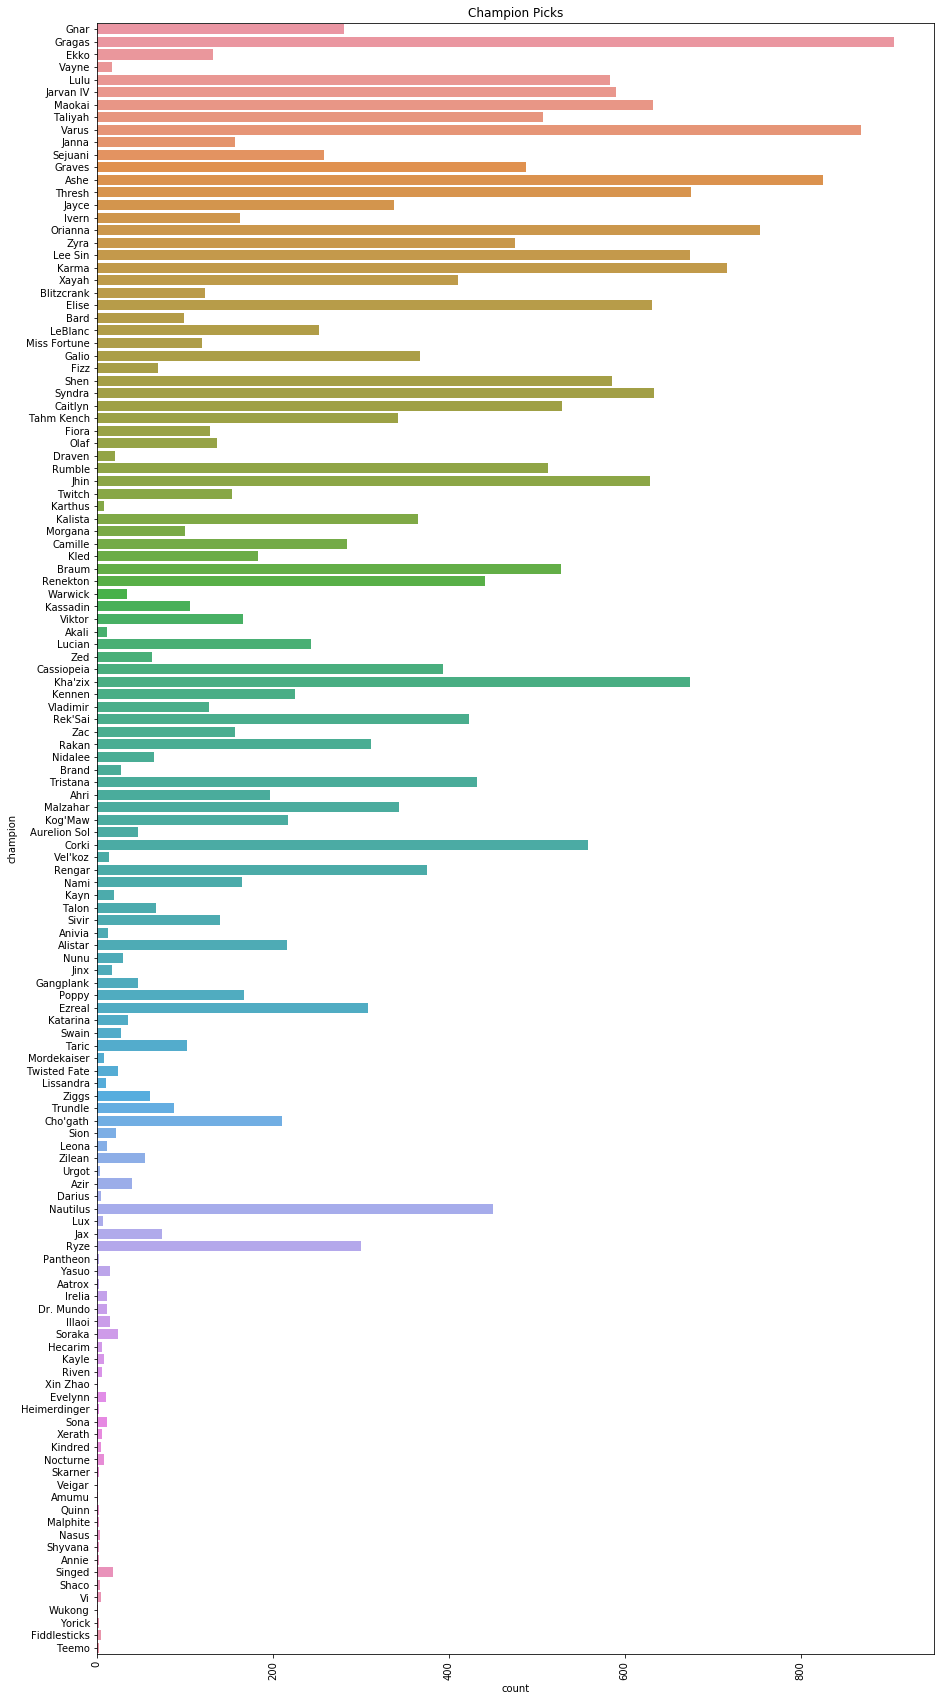

In [28]:
'''
Esse gráfico representa a quantidade de vezes em que cada Campeão foi escolhido na partido.
'''

fig, (ax1) = plt.subplots(ncols=1, sharey=False, figsize=(15,30))
plt.xticks(rotation=90)
sns.countplot(y=sortedPicks, data=lol_ML, ax=ax1)
ax1.set_title('Champion Picks')


In [29]:
'''
Uma cópia do novo dataframe será atribuída a variável s_LOL_ML que será a variável que será 
padronizada mais a frente
'''
s_lol_ML = lol_ML.copy()

In [30]:
s_lol_ML.head()

,result,s_side,champion,s_position,k,d,fd,teamdragkills,ft,teamtowerkills,dmgtochamps,totalgold,goldspent
0,0,1,Gnar,5,0,2,0.0,0,1.0,4,8725.0,9067.0,9025.0
1,0,1,Gragas,4,0,5,0.0,0,1.0,4,4300.0,7546.0,6650.0
2,0,1,Ekko,1,0,3,0.0,0,1.0,4,6698.0,9484.0,8700.0
3,0,1,Vayne,3,0,3,0.0,0,1.0,4,10367.0,8056.0,8275.0
4,0,1,Lulu,2,3,5,0.0,0,1.0,4,2269.0,6429.0,6880.0


<h3>Padronizando outros valores em strings </h3>
<p> Como dito anteriormente, os modelos preditivos aceitam apenas valores numéricos. E a padronização já foi feita para algumas variáveis de interesse, porém as strings referentes aos campeões ainda não foram padronizadas. Para realizar esse processo, dois métodos serão necessários: LabelEncoder, OneHotEncoder. Ambos pertencentes a biblioteca sklearn.preprocessing. <p>

In [31]:
#Aqui a coluna "champion" será padronizada usando o método LabelEncoder, transformando as strings em valores númericos.

#from sklearn.preprocessing import LabelEncoder, OneHotEncoder


'''
le = LabelEncoder()

s_lol_ML.iloc[:,2] = le.fit_transform(s_lol_ML.iloc[:,2])
s_lol_ML.head()
'''

'\nle = LabelEncoder()\n\ns_lol_ML.iloc[:,2] = le.fit_transform(s_lol_ML.iloc[:,2])\ns_lol_ML.head()\n'

In [32]:
'''
Para finalizar a padronização da coluna "champion", queremos informar ao nosso modelo preditivo que os números  nas colunas
não representam nenhum tipo de hierarquia. São apenas labels numéricos. Para isso será usado o método "One Hot Encoder", 
passando como parâmetro, a coluna que será transformada.
'''
import category_encoders as ce

ce_ohe = ce.OneHotEncoder(handle_unknown='ignore', use_cat_names=True)
s_lol_ML = ce_ohe.fit_transform(s_lol_ML)


In [33]:
lol_ML.head()

,result,s_side,champion,s_position,k,d,fd,teamdragkills,ft,teamtowerkills,dmgtochamps,totalgold,goldspent
0,0,1,Gnar,5,0,2,0.0,0,1.0,4,8725.0,9067.0,9025.0
1,0,1,Gragas,4,0,5,0.0,0,1.0,4,4300.0,7546.0,6650.0
2,0,1,Ekko,1,0,3,0.0,0,1.0,4,6698.0,9484.0,8700.0
3,0,1,Vayne,3,0,3,0.0,0,1.0,4,10367.0,8056.0,8275.0
4,0,1,Lulu,2,3,5,0.0,0,1.0,4,2269.0,6429.0,6880.0


In [34]:
s_lol_ML.head()

,result,s_side,champion_Gnar,champion_Gragas,champion_Ekko,champion_Vayne,champion_Lulu,champion_Jarvan IV,champion_Maokai,champion_Taliyah,champion_Varus,champion_Janna,champion_Sejuani,champion_Graves,champion_Ashe,champion_Thresh,champion_Jayce,champion_Ivern,champion_Orianna,champion_Zyra,champion_Lee Sin,champion_Karma,champion_Xayah,champion_Blitzcrank,champion_Elise,champion_Bard,champion_LeBlanc,champion_Miss Fortune,champion_Galio,champion_Fizz,champion_Shen,champion_Syndra,champion_Caitlyn,champion_Tahm Kench,champion_Fiora,champion_Olaf,champion_Draven,champion_Rumble,champion_Jhin,champion_Twitch,champion_Karthus,champion_Kalista,champion_Morgana,champion_Camille,champion_Kled,champion_Braum,champion_Renekton,champion_Warwick,champion_Kassadin,champion_Viktor,champion_Akali,champion_Lucian,champion_Zed,champion_Cassiopeia,champion_Kha'zix,champion_Kennen,champion_Vladimir,champion_Rek'Sai,champion_Zac,champion_Rakan,champion_Nidalee,champion_Brand,champion_Tristana,champion_Ahri,champion_Malzahar,champion_Kog'Maw,champion_Aurelion Sol,champion_Corki,champion_Vel'koz,champion_Rengar,champion_Nami,champion_Kayn,champion_Talon,champion_Sivir,champion_Anivia,champion_Alistar,champion_Nunu,champion_Jinx,champion_Gangplank,champion_Poppy,champion_Ezreal,champion_Katarina,champion_Swain,champion_Taric,champion_Mordekaiser,champion_Twisted Fate,champion_Lissandra,champion_Ziggs,champion_Trundle,champion_Cho'gath,champion_Sion,champion_Leona,champion_Zilean,champion_Urgot,champion_Azir,champion_Darius,champion_Nautilus,champion_Lux,champion_Jax,champion_Ryze,champion_Pantheon,champion_Yasuo,champion_Aatrox,champion_Irelia,champion_Dr. Mundo,champion_Illaoi,champion_Soraka,champion_Hecarim,champion_Kayle,champion_Riven,champion_Xin Zhao,champion_Evelynn,champion_Heimerdinger,champion_Sona,champion_Xerath,champion_Kindred,champion_Nocturne,champion_Skarner,champion_Veigar,champion_Amumu,champion_Quinn,champion_Malphite,champion_Nasus,champion_Shyvana,champion_Annie,champion_Singed,champion_Shaco,champion_Vi,champion_Wukong,champion_Yorick,champion_Fiddlesticks,champion_Teemo,s_position,k,d,fd,teamdragkills,ft,teamtowerkills,dmgtochamps,totalgold,goldspent
0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,2,0.0,0,1.0,4,8725.0,9067.0,9025.0
1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,5,0.0,0,1.0,4,4300.0,7546.0,6650.0
2,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3,0.0,0,1.0,4,6698.0,9484.0,8700.0
3,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,3,0.0,0,1.0,4,10367.0,8056.0,8275.0
4,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,3,5,0.0,0,1.0,4,2269.0,6429.0,6880.0


In [35]:
'''
Dataframe antes da padronização das strings
'''
lol_ML.shape

(25830, 13)

In [36]:
'''
Dataframe depois da padronização das strings e depois da exclusão
das linhas contendo valores nulos. As antigas colunas "side", "position"
e "champion" ( cujas versões não padronizadas ainda estavam no dataframe 
junto com suas versões padronizadas), foram apagadas também, restando
apenas as suas colunas com as versões padronizadas.
'''
s_lol_ML.shape

(25830, 142)

<h3>Dividindo o Dataframe: </h3>
<p>A divisão feita pelo trai_test_split é aleatória mas é feito somente uma única vez. Para garantir a aleatoriedade do processo e a separação igualitária do dataframe em treino e teste, podemos dividir o dataframe em pecaços iguais ("folds"), embaralhar cada pedaço ("shuffle") e aplicar a divisão em cada pedaço. Para fazer isso, precisamos usar o método "Kfold" pertencente a biblioteca "sklearn.model_selection"</p>

<h3>Calculando a acurácia:</h3>
<p>Após as variáveis de interesse serem treinadas, elas serão usadas para tentar prever a vitória da partida comparando com as variáveis de teste. A acurácia, medirá a taxa de acerto das variáveis de interesse na previsão sobre as chances de vitória da partida. O cálculo da acurácia será feito por cada divisão feita pelo método kfold. No final, será calculado a <b>média da acurácia de todas as  divisões do dataframe feita pelo método kfold</b>. Essa será a acurácia final, tendo somente a variável de interesse calculada no momento como parâmetro determinístico para a vitória da partida. </p>

In [37]:
from sklearn.model_selection import KFold


<h3>Dividindo as variáveis de interesse da variável que queremos calcular, que são as chances de vitória (result = 1)</h3>

In [38]:
#Uma amostragem de todas as variáveis de interesse mais a variável objetivo: "result"
s_lol_ML.head()

,result,s_side,champion_Gnar,champion_Gragas,champion_Ekko,champion_Vayne,champion_Lulu,champion_Jarvan IV,champion_Maokai,champion_Taliyah,champion_Varus,champion_Janna,champion_Sejuani,champion_Graves,champion_Ashe,champion_Thresh,champion_Jayce,champion_Ivern,champion_Orianna,champion_Zyra,champion_Lee Sin,champion_Karma,champion_Xayah,champion_Blitzcrank,champion_Elise,champion_Bard,champion_LeBlanc,champion_Miss Fortune,champion_Galio,champion_Fizz,champion_Shen,champion_Syndra,champion_Caitlyn,champion_Tahm Kench,champion_Fiora,champion_Olaf,champion_Draven,champion_Rumble,champion_Jhin,champion_Twitch,champion_Karthus,champion_Kalista,champion_Morgana,champion_Camille,champion_Kled,champion_Braum,champion_Renekton,champion_Warwick,champion_Kassadin,champion_Viktor,champion_Akali,champion_Lucian,champion_Zed,champion_Cassiopeia,champion_Kha'zix,champion_Kennen,champion_Vladimir,champion_Rek'Sai,champion_Zac,champion_Rakan,champion_Nidalee,champion_Brand,champion_Tristana,champion_Ahri,champion_Malzahar,champion_Kog'Maw,champion_Aurelion Sol,champion_Corki,champion_Vel'koz,champion_Rengar,champion_Nami,champion_Kayn,champion_Talon,champion_Sivir,champion_Anivia,champion_Alistar,champion_Nunu,champion_Jinx,champion_Gangplank,champion_Poppy,champion_Ezreal,champion_Katarina,champion_Swain,champion_Taric,champion_Mordekaiser,champion_Twisted Fate,champion_Lissandra,champion_Ziggs,champion_Trundle,champion_Cho'gath,champion_Sion,champion_Leona,champion_Zilean,champion_Urgot,champion_Azir,champion_Darius,champion_Nautilus,champion_Lux,champion_Jax,champion_Ryze,champion_Pantheon,champion_Yasuo,champion_Aatrox,champion_Irelia,champion_Dr. Mundo,champion_Illaoi,champion_Soraka,champion_Hecarim,champion_Kayle,champion_Riven,champion_Xin Zhao,champion_Evelynn,champion_Heimerdinger,champion_Sona,champion_Xerath,champion_Kindred,champion_Nocturne,champion_Skarner,champion_Veigar,champion_Amumu,champion_Quinn,champion_Malphite,champion_Nasus,champion_Shyvana,champion_Annie,champion_Singed,champion_Shaco,champion_Vi,champion_Wukong,champion_Yorick,champion_Fiddlesticks,champion_Teemo,s_position,k,d,fd,teamdragkills,ft,teamtowerkills,dmgtochamps,totalgold,goldspent
0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,2,0.0,0,1.0,4,8725.0,9067.0,9025.0
1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,5,0.0,0,1.0,4,4300.0,7546.0,6650.0
2,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3,0.0,0,1.0,4,6698.0,9484.0,8700.0
3,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,3,0.0,0,1.0,4,10367.0,8056.0,8275.0
4,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,3,5,0.0,0,1.0,4,2269.0,6429.0,6880.0


<h3>Testando múltiplos modelos preditivos em função de sua performance: </h3>
<p>Antes de realizar os processos de cálculo das chances de vitória em função das variáveis de interesse através dos modelos preditivos, primeiramente é necessário definir qual é o modelo preditivo que possui melhor perfomance para a construção de análises preditivas. 6 modelos serão analisados com todas as variáveis possíveis. Entretanto, no final, somente um modelo será usado para todas as variáveis. São eles: LOGISTIC_REGRESSION, LINEAR_DISCRIMINATION_ANALISYS, KNEIGHBORS_CLASSIFIER, RANDOM_FORES_CLASSIFIER, DECISION_TREE_CLASSIFIER, GAUSSIANA. </p>

<h3>Cross Validation Score NÃO treina (fit) o dataset para futuras previsões</h3>
<p>
    De acordo com uma dúvida publicada no Stack Overflow (https://stackoverflow.com/questions/42263915/using-sklearn-cross-val-score-and-kfolds-to-fit-and-help-predict-model?rq=1) o método cross_validation_score serve apenas estimar quais modelos predivitos possuem a melhor performance. Isso é feito a partir da subdivisão do dataset de treino ( o dataset de teste original não é trabalhado), em vários folds ( pedaços) onde 1 dos pedaços será usado como teste. Isso será feito k vezes ( k é passado como parâmetro), sendo que em cada iteração, 1 novo pedaço do dataset de treino será escolhido para testar a acurácia do mesmo. No final, a média da acurácia das k iterações será feita e o resultado da acurácia será estimado.  O dataset de teste original não é usado é porque o objetivo é generalizar a previsão para análises futuras. Não queremos que o algoritmo decore os resultados do dataset de teste. .</p>

In [39]:
s_lol_ML.iloc[:,1:2].head()

,s_side
0,1
1,1
2,1
3,1
4,1


In [40]:
'''
A primeira variável de interesse que será investigada será:
s_side == Lado em que o time começou na partida (Azul ou Vermelho)
'''
X1 = np.array(s_lol_ML.iloc[:,1:2]).reshape(-1, 1)
y1 = np.array(s_lol_ML['result'])

In [41]:
'''
Aqui os modelos preditivos estão sendo testados em função de sua performance. No final, somente 1
será escolhido para ser usado. O método utilizado é dividir o dataset em 10 pedaços e calcular a 
acurácia de cada pedaço. No final calcularemos média da acurácia desses 10 pedaços. Quanto maior
a média final, melhor o modelo preditivo. Importante salientar que o treinamento não está sendo feito
aqui. Apenas estimativas de quais modelos funcionam melhor. 
'''

models = []
models.append(('RANDOM_FOREST_CLASSIFIER', RandomForestClassifier(n_estimators=10, random_state = 0)))
models.append(('LOGISTIC_REGRESSION', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LINEAR_DISCRIMINATION_ANALISYS', LinearDiscriminantAnalysis()))
models.append(('KNEIGHBORS_CLASSIFIER', KNeighborsClassifier()))
models.append(('DECISION_TREE_CLASSIFIER', DecisionTreeClassifier()))
models.append(('GAUSSIANA', GaussianNB()))
#models.append(('SVM', SVC(gamma='auto')))



# evaluate each model in turn
results1 = []
names = []
for name, model in models:
    kf1 = KFold(10, shuffle=True, random_state = 1)
    hit_rate = 0
    for training_lines1, testing_lines1 in kf1.split(X1,y1):
       
        X1_train, X1_test = X1[training_lines1], X1[testing_lines1]
        y1_train, y1_test = y1[training_lines1], y1[testing_lines1]
        
        cv_results = cross_val_score(model, X1_train, y1_train, cv=kf1, scoring='accuracy')
        results1.append(cv_results)
        names.append(name)
        
        print('%s => Accuracy: %f, Standard Deviation: (%f)' % (name, cv_results.mean(), cv_results.std()))
        
        hit_rate += cv_results.mean()
        
    print("Média das 10 acurácias: ",hit_rate/10)
    print()

# Compare Algorithms
#pyplot.boxplot(results, labels=names)
#pyplot.title('Algorithm Comparison')
#pyplot.show()

RANDOM_FOREST_CLASSIFIER => Accuracy: 0.564933, Standard Deviation: (0.008045)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.566525, Standard Deviation: (0.008278)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.568031, Standard Deviation: (0.010928)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.566525, Standard Deviation: (0.007911)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.565190, Standard Deviation: (0.011104)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.566525, Standard Deviation: (0.008856)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.566008, Standard Deviation: (0.009123)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.566525, Standard Deviation: (0.006153)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.566870, Standard Deviation: (0.009954)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.566825, Standard Deviation: (0.009005)
Média das 10 acurácias:  0.5663957211333817

LOGISTIC_REGRESSION => Accuracy: 0.564933, Standard Deviation: (0.008045)
LOGISTIC_REGRESSION => Accuracy: 0.566525, Standard Deviation: (0.008278)
LOGISTIC_REGRESSI

In [42]:
s_lol_ML.iloc[:,2:-10].head()

,champion_Gnar,champion_Gragas,champion_Ekko,champion_Vayne,champion_Lulu,champion_Jarvan IV,champion_Maokai,champion_Taliyah,champion_Varus,champion_Janna,champion_Sejuani,champion_Graves,champion_Ashe,champion_Thresh,champion_Jayce,champion_Ivern,champion_Orianna,champion_Zyra,champion_Lee Sin,champion_Karma,champion_Xayah,champion_Blitzcrank,champion_Elise,champion_Bard,champion_LeBlanc,champion_Miss Fortune,champion_Galio,champion_Fizz,champion_Shen,champion_Syndra,champion_Caitlyn,champion_Tahm Kench,champion_Fiora,champion_Olaf,champion_Draven,champion_Rumble,champion_Jhin,champion_Twitch,champion_Karthus,champion_Kalista,champion_Morgana,champion_Camille,champion_Kled,champion_Braum,champion_Renekton,champion_Warwick,champion_Kassadin,champion_Viktor,champion_Akali,champion_Lucian,champion_Zed,champion_Cassiopeia,champion_Kha'zix,champion_Kennen,champion_Vladimir,champion_Rek'Sai,champion_Zac,champion_Rakan,champion_Nidalee,champion_Brand,champion_Tristana,champion_Ahri,champion_Malzahar,champion_Kog'Maw,champion_Aurelion Sol,champion_Corki,champion_Vel'koz,champion_Rengar,champion_Nami,champion_Kayn,champion_Talon,champion_Sivir,champion_Anivia,champion_Alistar,champion_Nunu,champion_Jinx,champion_Gangplank,champion_Poppy,champion_Ezreal,champion_Katarina,champion_Swain,champion_Taric,champion_Mordekaiser,champion_Twisted Fate,champion_Lissandra,champion_Ziggs,champion_Trundle,champion_Cho'gath,champion_Sion,champion_Leona,champion_Zilean,champion_Urgot,champion_Azir,champion_Darius,champion_Nautilus,champion_Lux,champion_Jax,champion_Ryze,champion_Pantheon,champion_Yasuo,champion_Aatrox,champion_Irelia,champion_Dr. Mundo,champion_Illaoi,champion_Soraka,champion_Hecarim,champion_Kayle,champion_Riven,champion_Xin Zhao,champion_Evelynn,champion_Heimerdinger,champion_Sona,champion_Xerath,champion_Kindred,champion_Nocturne,champion_Skarner,champion_Veigar,champion_Amumu,champion_Quinn,champion_Malphite,champion_Nasus,champion_Shyvana,champion_Annie,champion_Singed,champion_Shaco,champion_Vi,champion_Wukong,champion_Yorick,champion_Fiddlesticks,champion_Teemo
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [43]:
'''
A segunda variável de interesse que será investigada será:
champion == Campeões escolhidos na partida pelo time
'''
X2 = np.array(s_lol_ML.iloc[:,2:-10])
y2 = np.array(s_lol_ML['result'])

In [44]:
models = []
models.append(('RANDOM_FOREST_CLASSIFIER', RandomForestClassifier(n_estimators=10, random_state = 0)))
models.append(('LOGISTIC_REGRESSION', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LINEAR_DISCRIMINATION_ANALISYS', LinearDiscriminantAnalysis()))
models.append(('KNEIGHBORS_CLASSIFIER', KNeighborsClassifier()))
models.append(('DECISION_TREE_CLASSIFIER', DecisionTreeClassifier()))
models.append(('GAUSSIANA', GaussianNB()))
#models.append(('SVM', SVC(gamma='auto')))



# evaluate each model in turn
results2 = []
names = []
for name, model in models:
    kf2 = KFold(10, shuffle=True, random_state = 1)
    hit_rate = 0
    for training_lines2, testing_lines2 in kf2.split(X2,y2):
       
        X2_train, X2_test = X2[training_lines2], X2[testing_lines2]
        y2_train, y2_test = y2[training_lines2], y2[testing_lines2]
        
        cv_results = cross_val_score(model, X2_train, y2_train, cv=kf2, scoring='accuracy')
        results2.append(cv_results)
        names.append(name)
        
        print('%s => Accuracy: %f, Standard Deviation: (%f)' % (name, cv_results.mean(), cv_results.std()))
        
        hit_rate += cv_results.mean()
        
    #accuracy_mean1 = np.mean(results1)
    print("Média das 10 acurácias: ",hit_rate/10)
    print()

# Compare Algorithms
#pyplot.boxplot(results, labels=names)
#pyplot.title('Algorithm Comparison')
#pyplot.show()

RANDOM_FOREST_CLASSIFIER => Accuracy: 0.509571, Standard Deviation: (0.006111)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.513314, Standard Deviation: (0.008267)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.510518, Standard Deviation: (0.008167)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.510517, Standard Deviation: (0.011471)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.515250, Standard Deviation: (0.008243)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.515507, Standard Deviation: (0.010084)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.509828, Standard Deviation: (0.009628)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.509485, Standard Deviation: (0.009227)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.513571, Standard Deviation: (0.007251)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.518389, Standard Deviation: (0.006747)
Média das 10 acurácias:  0.5125951603649621

LOGISTIC_REGRESSION => Accuracy: 0.509055, Standard Deviation: (0.005652)
LOGISTIC_REGRESSION => Accuracy: 0.516583, Standard Deviation: (0.008887)
LOGISTIC_REGRESSI

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anacond

LINEAR_DISCRIMINATION_ANALISYS => Accuracy: 0.508796, Standard Deviation: (0.005436)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anacond

LINEAR_DISCRIMINATION_ANALISYS => Accuracy: 0.516411, Standard Deviation: (0.008787)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anacond

LINEAR_DISCRIMINATION_ANALISYS => Accuracy: 0.510948, Standard Deviation: (0.007846)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anacond

LINEAR_DISCRIMINATION_ANALISYS => Accuracy: 0.511421, Standard Deviation: (0.011618)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anacond

LINEAR_DISCRIMINATION_ANALISYS => Accuracy: 0.515551, Standard Deviation: (0.007841)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anacond

LINEAR_DISCRIMINATION_ANALISYS => Accuracy: 0.515980, Standard Deviation: (0.010840)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anacond

LINEAR_DISCRIMINATION_ANALISYS => Accuracy: 0.512840, Standard Deviation: (0.008339)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anacond

LINEAR_DISCRIMINATION_ANALISYS => Accuracy: 0.507334, Standard Deviation: (0.010233)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anacond

LINEAR_DISCRIMINATION_ANALISYS => Accuracy: 0.513184, Standard Deviation: (0.009070)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anacond

LINEAR_DISCRIMINATION_ANALISYS => Accuracy: 0.517227, Standard Deviation: (0.008020)
Média das 10 acurácias:  0.5129692410193771

KNEIGHBORS_CLASSIFIER => Accuracy: 0.498043, Standard Deviation: (0.012047)
KNEIGHBORS_CLASSIFIER => Accuracy: 0.506516, Standard Deviation: (0.006755)
KNEIGHBORS_CLASSIFIER => Accuracy: 0.504280, Standard Deviation: (0.012285)
KNEIGHBORS_CLASSIFIER => Accuracy: 0.502257, Standard Deviation: (0.012685)
KNEIGHBORS_CLASSIFIER => Accuracy: 0.503937, Standard Deviation: (0.011822)
KNEIGHBORS_CLASSIFIER => Accuracy: 0.503248, Standard Deviation: (0.006533)
KNEIGHBORS_CLASSIFIER => Accuracy: 0.503549, Standard Deviation: (0.010679)
KNEIGHBORS_CLASSIFIER => Accuracy: 0.505356, Standard Deviation: (0.011514)
KNEIGHBORS_CLASSIFIER => Accuracy: 0.503592, Standard Deviation: (0.009062)
KNEIGHBORS_CLASSIFIER => Accuracy: 0.506904, Standard Deviation: (0.005384)
Média das 10 acurácias:  0.5037682471822775

DECISION_TREE_CLASSIFIER => Accuracy: 0.508925, Standard Deviatio

In [45]:
s_lol_ML.iloc[:,-10:-9].head()

,s_position
0,5
1,4
2,1
3,3
4,2


In [46]:
'''
A terceira variável de interesse que será investigada será:
s_position == Posição em que os jogadores jogam na partida. Existem 5 posições ao todo.
'''
X3 = np.array(s_lol_ML.iloc[:,-10:-9]).reshape(-1, 1)
y3 = np.array(s_lol_ML['result'])

In [47]:
models = []
models.append(('RANDOM_FOREST_CLASSIFIER', RandomForestClassifier(n_estimators=10, random_state = 0)))
models.append(('LOGISTIC_REGRESSION', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LINEAR_DISCRIMINATION_ANALISYS', LinearDiscriminantAnalysis()))
models.append(('KNEIGHBORS_CLASSIFIER', KNeighborsClassifier()))
models.append(('DECISION_TREE_CLASSIFIER', DecisionTreeClassifier()))
models.append(('GAUSSIANA', GaussianNB()))
#models.append(('SVM', SVC(gamma='auto')))



# evaluate each model in turn
results3 = []
names = []
for name, model in models:
    kf3 = KFold(10, shuffle=True, random_state = 1)
    hit_rate = 0
    for training_lines3, testing_lines3 in kf3.split(X3,y3):
       
        X3_train, X3_test = X3[training_lines3], X3[testing_lines3]
        y3_train, y3_test = y3[training_lines3], y3[testing_lines3]
        
        cv_results = cross_val_score(model, X3_train, y3_train, cv=kf3, scoring='accuracy')
        results3.append(cv_results)
        names.append(name)
        
        print('%s => Accuracy: %f, Standard Deviation: (%f)' % (name, cv_results.mean(), cv_results.std()))
        
        hit_rate += cv_results.mean()
        
    #accuracy_mean1 = np.mean(results1)
    print("Média das 10 acurácias: ",hit_rate/10)
    print()

# Compare Algorithms
#pyplot.boxplot(results, labels=names)
#pyplot.title('Algorithm Comparison')
#pyplot.show()

RANDOM_FOREST_CLASSIFIER => Accuracy: 0.495419, Standard Deviation: (0.009884)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.487246, Standard Deviation: (0.006856)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.495676, Standard Deviation: (0.005615)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.491160, Standard Deviation: (0.007227)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.498258, Standard Deviation: (0.007661)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.485870, Standard Deviation: (0.010260)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.491934, Standard Deviation: (0.010467)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.487375, Standard Deviation: (0.006107)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.489869, Standard Deviation: (0.008477)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.486687, Standard Deviation: (0.006380)
Média das 10 acurácias:  0.4909493846353154

LOGISTIC_REGRESSION => Accuracy: 0.495246, Standard Deviation: (0.012225)
LOGISTIC_REGRESSION => Accuracy: 0.491719, Standard Deviation: (0.008526)
LOGISTIC_REGRESSI

In [48]:
s_lol_ML.iloc[:,-9:-8].head()

,k
0,0
1,0
2,0
3,0
4,3


In [49]:
'''
A quarta variável de interesse que será investigada 
será: k == Quantidade de kills que o campeão obteve na partida
'''
X4 = np.array(s_lol_ML.iloc[:,-9:-8]).reshape(-1, 1)
y4 = np.array(s_lol_ML['result'])

In [50]:
models = []
models.append(('RANDOM_FOREST_CLASSIFIER', RandomForestClassifier(n_estimators=10, random_state = 0)))
models.append(('LOGISTIC_REGRESSION', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LINEAR_DISCRIMINATION_ANALISYS', LinearDiscriminantAnalysis()))
models.append(('KNEIGHBORS_CLASSIFIER', KNeighborsClassifier()))
models.append(('DECISION_TREE_CLASSIFIER', DecisionTreeClassifier()))
models.append(('GAUSSIANA', GaussianNB()))
#models.append(('SVM', SVC(gamma='auto')))



# evaluate each model in turn
results4 = []
names = []
for name, model in models:
    kf4 = KFold(10, shuffle=True, random_state = 1)
    hit_rate = 0
    for training_lines4, testing_lines4 in kf4.split(X4,y4):
       
        X4_train, X4_test = X4[training_lines4], X4[testing_lines4]
        y4_train, y4_test = y4[training_lines4], y4[testing_lines4]
        
        cv_results = cross_val_score(model, X4_train, y4_train, cv=kf4, scoring='accuracy')
        results4.append(cv_results)
        names.append(name)
        
        print('%s => Accuracy: %f, Standard Deviation: (%f)' % (name, cv_results.mean(), cv_results.std()))
        
        hit_rate += cv_results.mean()
        
    #accuracy_mean1 = np.mean(results1)
    print("Média das 10 acurácias: ",hit_rate/10)
    print()

# Compare Algorithms
#pyplot.boxplot(results, labels=names)
#pyplot.title('Algorithm Comparison')
#pyplot.show()

RANDOM_FOREST_CLASSIFIER => Accuracy: 0.655182, Standard Deviation: (0.008523)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.651612, Standard Deviation: (0.009096)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.654020, Standard Deviation: (0.012456)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.651783, Standard Deviation: (0.008666)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.653934, Standard Deviation: (0.009153)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.651782, Standard Deviation: (0.008307)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.651697, Standard Deviation: (0.008828)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.652643, Standard Deviation: (0.009209)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.651740, Standard Deviation: (0.008079)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.652384, Standard Deviation: (0.011652)
Média das 10 acurácias:  0.6526777709918014

LOGISTIC_REGRESSION => Accuracy: 0.655182, Standard Deviation: (0.008523)
LOGISTIC_REGRESSION => Accuracy: 0.651698, Standard Deviation: (0.008990)
LOGISTIC_REGRESSI

In [51]:
s_lol_ML.iloc[:,-8:-7].head()

,d
0,2
1,5
2,3
3,3
4,5


In [52]:
'''
A quinta variável de interesse que será investigada será:
d == Quantidade de mortes que o campeão sofreu na partida
'''
X5 = np.array(s_lol_ML.iloc[:,-8:-7]).reshape(-1, 1)
y5 = np.array(s_lol_ML['result'])

In [53]:
models = []
models.append(('RANDOM_FOREST_CLASSIFIER', RandomForestClassifier(n_estimators=10, random_state = 0)))
models.append(('LOGISTIC_REGRESSION', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LINEAR_DISCRIMINATION_ANALISYS', LinearDiscriminantAnalysis()))
models.append(('KNEIGHBORS_CLASSIFIER', KNeighborsClassifier()))
models.append(('DECISION_TREE_CLASSIFIER', DecisionTreeClassifier()))
models.append(('GAUSSIANA', GaussianNB()))
#models.append(('SVM', SVC(gamma='auto')))



# evaluate each model in turn
results5 = []
names = []
for name, model in models:
    kf5 = KFold(10, shuffle=True, random_state = 1)
    hit_rate = 0
    for training_lines5, testing_lines5 in kf5.split(X5,y5):
       
        X5_train, X5_test = X5[training_lines5], X5[testing_lines5]
        y5_train, y5_test = y5[training_lines5], y5[testing_lines5]
        
        cv_results = cross_val_score(model, X5_train, y5_train, cv=kf5, scoring='accuracy')
        results5.append(cv_results)
        names.append(name)
        
        print('%s => Accuracy: %f, Standard Deviation: (%f)' % (name, cv_results.mean(), cv_results.std()))
        
        hit_rate += cv_results.mean()
        
    #accuracy_mean1 = np.mean(results1)
    print("Média das 10 acurácias: ",hit_rate/10)
    print()

# Compare Algorithms
#pyplot.boxplot(results, labels=names)
#pyplot.title('Algorithm Comparison')
#pyplot.show()

RANDOM_FOREST_CLASSIFIER => Accuracy: 0.712436, Standard Deviation: (0.010591)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.708695, Standard Deviation: (0.011885)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.709510, Standard Deviation: (0.007209)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.709983, Standard Deviation: (0.009274)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.710372, Standard Deviation: (0.010626)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.708307, Standard Deviation: (0.007635)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.706931, Standard Deviation: (0.008861)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.707446, Standard Deviation: (0.009585)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.710930, Standard Deviation: (0.008216)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.706543, Standard Deviation: (0.010285)
Média das 10 acurácias:  0.7091154313104956

LOGISTIC_REGRESSION => Accuracy: 0.708522, Standard Deviation: (0.009683)
LOGISTIC_REGRESSION => Accuracy: 0.709253, Standard Deviation: (0.008694)
LOGISTIC_REGRESSI

In [54]:
s_lol_ML.iloc[:,-7:-6].head()

,fd
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [55]:
'''
A sexta variável de interesse que será investigada será:
fd == Diz se o time foi quem matou o primeiro dragão da partida;
'''
X6 = np.array(s_lol_ML.iloc[:,-7:-6]).reshape(-1, 1)
y6 = np.array(s_lol_ML['result'])

In [56]:
models = []
models.append(('RANDOM_FOREST_CLASSIFIER', RandomForestClassifier(n_estimators=10, random_state = 0)))
models.append(('LOGISTIC_REGRESSION', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LINEAR_DISCRIMINATION_ANALISYS', LinearDiscriminantAnalysis()))
models.append(('KNEIGHBORS_CLASSIFIER', KNeighborsClassifier()))
models.append(('DECISION_TREE_CLASSIFIER', DecisionTreeClassifier()))
models.append(('GAUSSIANA', GaussianNB()))
#models.append(('SVM', SVC(gamma='auto')))



# evaluate each model in turn
results6 = []
names = []
for name, model in models:
    kf6 = KFold(10, shuffle=True, random_state = 1)
    hit_rate = 0
    for training_lines6, testing_lines6 in kf6.split(X6,y6):
       
        X6_train, X6_test = X6[training_lines6], X6[testing_lines6]
        y6_train, y6_test = y6[training_lines6], y6[testing_lines6]
        
        cv_results = cross_val_score(model, X6_train, y6_train, cv=kf6, scoring='accuracy')
        results6.append(cv_results)
        names.append(name)
        
        print('%s => Accuracy: %f, Standard Deviation: (%f)' % (name, cv_results.mean(), cv_results.std()))
        
        hit_rate += cv_results.mean()
        
    #accuracy_mean1 = np.mean(results1)
    print("Média das 10 acurácias: ",hit_rate/10)
    print()

# Compare Algorithms
#pyplot.boxplot(results, labels=names)
#pyplot.title('Algorithm Comparison')
#pyplot.show()

RANDOM_FOREST_CLASSIFIER => Accuracy: 0.531165, Standard Deviation: (0.011931)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.528198, Standard Deviation: (0.009743)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.531553, Standard Deviation: (0.011850)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.531079, Standard Deviation: (0.012161)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.531036, Standard Deviation: (0.007820)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.530390, Standard Deviation: (0.008352)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.528068, Standard Deviation: (0.010456)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.529142, Standard Deviation: (0.009492)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.530779, Standard Deviation: (0.010818)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.530562, Standard Deviation: (0.006738)
Média das 10 acurácias:  0.5301974145429645

LOGISTIC_REGRESSION => Accuracy: 0.531165, Standard Deviation: (0.011931)
LOGISTIC_REGRESSION => Accuracy: 0.528198, Standard Deviation: (0.009743)
LOGISTIC_REGRESSI

In [57]:
s_lol_ML.iloc[:,-6:-5].head()

,teamdragkills
0,0
1,0
2,0
3,0
4,0


In [58]:
'''
A sétima variável de interesse que será investigada será:
teamdragkills == Diz quantos dragões foram mortos pelo time
'''
X7 = np.array(s_lol_ML.iloc[:,-6:-5]).reshape(-1, 1)
y7 = np.array(s_lol_ML['result'])

In [59]:
models = []
models.append(('RANDOM_FOREST_CLASSIFIER', RandomForestClassifier(n_estimators=10, random_state = 0)))
models.append(('LOGISTIC_REGRESSION', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LINEAR_DISCRIMINATION_ANALISYS', LinearDiscriminantAnalysis()))
models.append(('KNEIGHBORS_CLASSIFIER', KNeighborsClassifier()))
models.append(('DECISION_TREE_CLASSIFIER', DecisionTreeClassifier()))
models.append(('GAUSSIANA', GaussianNB()))
#models.append(('SVM', SVC(gamma='auto')))



# evaluate each model in turn
results7 = []
names = []
for name, model in models:
    kf7 = KFold(10, shuffle=True, random_state = 1)
    hit_rate = 0
    for training_lines7, testing_lines7 in kf7.split(X7,y7):
       
        X7_train, X7_test = X7[training_lines7], X7[testing_lines7]
        y7_train, y7_test = y7[training_lines7], y7[testing_lines7]
        
        cv_results = cross_val_score(model, X7_train, y7_train, cv=kf7, scoring='accuracy')
        results7.append(cv_results)
        names.append(name)
        
        print('%s => Accuracy: %f, Standard Deviation: (%f)' % (name, cv_results.mean(), cv_results.std()))
        
        hit_rate += cv_results.mean()
        
    #accuracy_mean1 = np.mean(results1)
    print("Média das 10 acurácias: ",hit_rate/10)
    print()

# Compare Algorithms
#pyplot.boxplot(results, labels=names)
#pyplot.title('Algorithm Comparison')
#pyplot.show()

RANDOM_FOREST_CLASSIFIER => Accuracy: 0.756312, Standard Deviation: (0.011778)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.755409, Standard Deviation: (0.010768)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.757561, Standard Deviation: (0.012912)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.757216, Standard Deviation: (0.008735)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.754937, Standard Deviation: (0.008075)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.756313, Standard Deviation: (0.007891)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.756957, Standard Deviation: (0.007239)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.758076, Standard Deviation: (0.008767)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.756312, Standard Deviation: (0.007927)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.755367, Standard Deviation: (0.006566)
Média das 10 acurácias:  0.7564459274887569

LOGISTIC_REGRESSION => Accuracy: 0.756312, Standard Deviation: (0.011778)
LOGISTIC_REGRESSION => Accuracy: 0.755409, Standard Deviation: (0.010768)
LOGISTIC_REGRESSI

In [60]:
s_lol_ML.iloc[:,-5:-4].head()

,ft
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [61]:
'''
A oitava variável de interesse que será investigada será:
ft == Diz se o time foi o primeiro a ter uma torre destruída pelo oponente
'''
X8 = np.array(s_lol_ML.iloc[:,-5:-4]).reshape(-1, 1)
y8 = np.array(s_lol_ML['result'])

In [62]:
models = []
models.append(('RANDOM_FOREST_CLASSIFIER', RandomForestClassifier(n_estimators=10, random_state = 0)))
models.append(('LOGISTIC_REGRESSION', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LINEAR_DISCRIMINATION_ANALISYS', LinearDiscriminantAnalysis()))
models.append(('KNEIGHBORS_CLASSIFIER', KNeighborsClassifier()))
models.append(('DECISION_TREE_CLASSIFIER', DecisionTreeClassifier()))
models.append(('GAUSSIANA', GaussianNB()))
#models.append(('SVM', SVC(gamma='auto')))



# evaluate each model in turn
results8 = []
names = []
for name, model in models:
    kf8 = KFold(10, shuffle=True, random_state = 1)
    hit_rate = 0
    for training_lines8, testing_lines8 in kf8.split(X8,y8):
       
        X8_train, X8_test = X8[training_lines8], X8[testing_lines8]
        y8_train, y8_test = y8[training_lines8], y8[testing_lines8]
        
        cv_results = cross_val_score(model, X8_train, y8_train, cv=kf8, scoring='accuracy')
        results8.append(cv_results)
        names.append(name)
        
        print('%s => Accuracy: %f, Standard Deviation: (%f)' % (name, cv_results.mean(), cv_results.std()))
        
        hit_rate += cv_results.mean()
        
    #accuracy_mean1 = np.mean(results1)
    print("Média das 10 acurácias: ",hit_rate/10)
    print()

# Compare Algorithms
#pyplot.boxplot(results, labels=names)
#pyplot.title('Algorithm Comparison')
#pyplot.show()

RANDOM_FOREST_CLASSIFIER => Accuracy: 0.671011, Standard Deviation: (0.006735)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.670924, Standard Deviation: (0.009013)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.670538, Standard Deviation: (0.008517)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.671226, Standard Deviation: (0.003752)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.670322, Standard Deviation: (0.008821)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.670795, Standard Deviation: (0.010713)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.671055, Standard Deviation: (0.006547)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.669979, Standard Deviation: (0.007610)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.668989, Standard Deviation: (0.006563)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.670539, Standard Deviation: (0.006301)
Média das 10 acurácias:  0.6705378139285252

LOGISTIC_REGRESSION => Accuracy: 0.671011, Standard Deviation: (0.006735)
LOGISTIC_REGRESSION => Accuracy: 0.670924, Standard Deviation: (0.009013)
LOGISTIC_REGRESSI

In [63]:
s_lol_ML.iloc[:,-4:-3].head()

,teamtowerkills
0,4
1,4
2,4
3,4
4,4


In [64]:
'''
A nona variável de interesse que será investigada será:
teamtowerkills == Diz o total de torres inimigas destruídas pelo time
'''
X9 = np.array(s_lol_ML.iloc[:,-4:-3]).reshape(-1, 1)
y9 = np.array(s_lol_ML['result'])

In [65]:
models = []
models.append(('RANDOM_FOREST_CLASSIFIER', RandomForestClassifier(n_estimators=10, random_state = 0)))
models.append(('LOGISTIC_REGRESSION', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LINEAR_DISCRIMINATION_ANALISYS', LinearDiscriminantAnalysis()))
models.append(('KNEIGHBORS_CLASSIFIER', KNeighborsClassifier()))
models.append(('DECISION_TREE_CLASSIFIER', DecisionTreeClassifier()))
models.append(('GAUSSIANA', GaussianNB()))
#models.append(('SVM', SVC(gamma='auto')))



# evaluate each model in turn
results9 = []
names = []
for name, model in models:
    kf9 = KFold(10, shuffle=True, random_state = 1)
    hit_rate = 0
    for training_lines9, testing_lines9 in kf9.split(X9,y9):
       
        X9_train, X9_test = X9[training_lines9], X9[testing_lines9]
        y9_train, y9_test = y9[training_lines9], y9[testing_lines9]
        
        cv_results = cross_val_score(model, X9_train, y9_train, cv=kf9, scoring='accuracy')
        results9.append(cv_results)
        names.append(name)
        
        print('%s => Accuracy: %f, Standard Deviation: (%f)' % (name, cv_results.mean(), cv_results.std()))
        
        hit_rate += cv_results.mean()
        
    #accuracy_mean1 = np.mean(results1)
    print("Média das 10 acurácias: ",hit_rate/10)
    print()

# Compare Algorithms
#pyplot.boxplot(results, labels=names)
#pyplot.title('Algorithm Comparison')
#pyplot.show()

RANDOM_FOREST_CLASSIFIER => Accuracy: 0.952854, Standard Deviation: (0.005006)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.952596, Standard Deviation: (0.005265)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.953069, Standard Deviation: (0.004911)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.952639, Standard Deviation: (0.005510)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.952510, Standard Deviation: (0.002867)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.952295, Standard Deviation: (0.004597)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.953973, Standard Deviation: (0.003730)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.953499, Standard Deviation: (0.004031)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.953026, Standard Deviation: (0.003727)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.953155, Standard Deviation: (0.003494)
Média das 10 acurácias:  0.952961593840801

LOGISTIC_REGRESSION => Accuracy: 0.952080, Standard Deviation: (0.005296)
LOGISTIC_REGRESSION => Accuracy: 0.950918, Standard Deviation: (0.006418)
LOGISTIC_REGRESSIO

In [66]:
s_lol_ML.iloc[:,-3:-2].head()

,dmgtochamps
0,8725.0
1,4300.0
2,6698.0
3,10367.0
4,2269.0


In [67]:
'''
A décima variável de interesse que será investigada será:
dmgtochamps == Total de dano que o time infligiu a campeões oponentes
'''
X10 = np.array(s_lol_ML.iloc[:,-3:-2]).reshape(-1, 1)
y10 = np.array(s_lol_ML['result'])

In [68]:
models = []
models.append(('RANDOM_FOREST_CLASSIFIER', RandomForestClassifier(n_estimators=10, random_state = 0)))
models.append(('LOGISTIC_REGRESSION', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LINEAR_DISCRIMINATION_ANALISYS', LinearDiscriminantAnalysis()))
models.append(('KNEIGHBORS_CLASSIFIER', KNeighborsClassifier()))
models.append(('DECISION_TREE_CLASSIFIER', DecisionTreeClassifier()))
models.append(('GAUSSIANA', GaussianNB()))
#models.append(('SVM', SVC(gamma='auto')))



# evaluate each model in turn
results10 = []
names = []
for name, model in models:
    kf10 = KFold(10, shuffle=True, random_state = 1)
    hit_rate = 0
    for training_lines10, testing_lines10 in kf10.split(X10,y10):
       
        X10_train, X10_test = X10[training_lines10], X10[testing_lines10]
        y10_train, y10_test = y10[training_lines10], y10[testing_lines10]
        
        cv_results = cross_val_score(model, X10_train, y10_train, cv=kf10, scoring='accuracy')
        results10.append(cv_results)
        names.append(name)
        
        print('%s => Accuracy: %f, Standard Deviation: (%f)' % (name, cv_results.mean(), cv_results.std()))
        
        hit_rate += cv_results.mean()
        
    #accuracy_mean1 = np.mean(results1)
    print("Média das 10 acurácias: ",hit_rate/10)
    print()

# Compare Algorithms
#pyplot.boxplot(results, labels=names)
#pyplot.title('Algorithm Comparison')
#pyplot.show()

RANDOM_FOREST_CLASSIFIER => Accuracy: 0.523079, Standard Deviation: (0.009146)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.519036, Standard Deviation: (0.012766)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.525874, Standard Deviation: (0.007839)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.517530, Standard Deviation: (0.009842)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.520540, Standard Deviation: (0.012510)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.522648, Standard Deviation: (0.006705)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.517915, Standard Deviation: (0.009835)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.524584, Standard Deviation: (0.007900)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.525573, Standard Deviation: (0.010269)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.521014, Standard Deviation: (0.010478)
Média das 10 acurácias:  0.5217794199840838

LOGISTIC_REGRESSION => Accuracy: 0.523812, Standard Deviation: (0.033223)
LOGISTIC_REGRESSION => Accuracy: 0.502515, Standard Deviation: (0.014343)
LOGISTIC_REGRESSI

In [69]:
s_lol_ML.iloc[:,-2:-1].head()

,totalgold
0,9067.0
1,7546.0
2,9484.0
3,8056.0
4,6429.0


In [70]:
'''
A décima e primeira variável de interesse que será investigada será:
totalgold == Diz o total de ouro ganho pelo time na partida
'''
X11 = np.array(s_lol_ML.iloc[:,-2:-1]).reshape(-1, 1)
y11 = np.array(s_lol_ML['result'])

In [71]:
models = []
models.append(('RANDOM_FOREST_CLASSIFIER', RandomForestClassifier(n_estimators=10, random_state = 0)))
models.append(('LOGISTIC_REGRESSION', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LINEAR_DISCRIMINATION_ANALISYS', LinearDiscriminantAnalysis()))
models.append(('KNEIGHBORS_CLASSIFIER', KNeighborsClassifier()))
models.append(('DECISION_TREE_CLASSIFIER', DecisionTreeClassifier()))
models.append(('GAUSSIANA', GaussianNB()))
#models.append(('SVM', SVC(gamma='auto')))



# evaluate each model in turn
results11 = []
names = []
for name, model in models:
    kf11 = KFold(10, shuffle=True, random_state = 1)
    hit_rate = 0
    for training_lines11, testing_lines11 in kf11.split(X11,y11):
       
        X11_train, X11_test = X11[training_lines11], X11[testing_lines11]
        y11_train, y11_test = y11[training_lines11], y11[testing_lines11]
        
        cv_results = cross_val_score(model, X11_train, y11_train, cv=kf11, scoring='accuracy')
        results11.append(cv_results)
        names.append(name)
        
        print('%s => Accuracy: %f, Standard Deviation: (%f)' % (name, cv_results.mean(), cv_results.std()))
        
        hit_rate += cv_results.mean()
        
    #accuracy_mean1 = np.mean(results1)
    print("Média das 10 acurácias: ",hit_rate/10)
    print()

# Compare Algorithms
#pyplot.boxplot(results, labels=names)
#pyplot.title('Algorithm Comparison')
#pyplot.show()

RANDOM_FOREST_CLASSIFIER => Accuracy: 0.564459, Standard Deviation: (0.010450)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.562396, Standard Deviation: (0.004423)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.563643, Standard Deviation: (0.007043)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.564933, Standard Deviation: (0.011413)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.564417, Standard Deviation: (0.009828)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.562869, Standard Deviation: (0.009745)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.565277, Standard Deviation: (0.006995)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.564159, Standard Deviation: (0.009771)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.562783, Standard Deviation: (0.006696)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.560546, Standard Deviation: (0.008795)
Média das 10 acurácias:  0.5635480706235079

LOGISTIC_REGRESSION => Accuracy: 0.643481, Standard Deviation: (0.008069)
LOGISTIC_REGRESSION => Accuracy: 0.643008, Standard Deviation: (0.010800)
LOGISTIC_REGRESSI

In [72]:
s_lol_ML.iloc[:,-1:].head()

,goldspent
0,9025.0
1,6650.0
2,8700.0
3,8275.0
4,6880.0


In [73]:
'''
A décima e segunda variável de interesse que será investigada será:
goldspent == Diz o total de ouro gasto pelo time na partida
'''
X12 = np.array(s_lol_ML.iloc[:,-1:]).reshape(-1, 1)
y12 = np.array(s_lol_ML['result'])

In [74]:
models = []
models.append(('RANDOM_FOREST_CLASSIFIER', RandomForestClassifier(n_estimators=10, random_state = 0)))
models.append(('LOGISTIC_REGRESSION', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LINEAR_DISCRIMINATION_ANALISYS', LinearDiscriminantAnalysis()))
models.append(('KNEIGHBORS_CLASSIFIER', KNeighborsClassifier()))
models.append(('DECISION_TREE_CLASSIFIER', DecisionTreeClassifier()))
models.append(('GAUSSIANA', GaussianNB()))
#models.append(('SVM', SVC(gamma='auto')))



# evaluate each model in turn
results12 = []
names = []
for name, model in models:
    kf12 = KFold(10, shuffle=True, random_state = 1)
    hit_rate = 0
    for training_lines12, testing_lines12 in kf12.split(X12,y12):
       
        X12_train, X12_test = X12[training_lines12], X12[testing_lines12]
        y12_train, y12_test = y12[training_lines12], y12[testing_lines12]
        
        cv_results = cross_val_score(model, X12_train, y12_train, cv=kf12, scoring='accuracy')
        results12.append(cv_results)
        names.append(name)
        
        print('%s => Accuracy: %f, Standard Deviation: (%f)' % (name, cv_results.mean(), cv_results.std()))
        
        hit_rate += cv_results.mean()
        
    #accuracy_mean1 = np.mean(results1)
    print("Média das 10 acurácias: ",hit_rate/10)
    print()

# Compare Algorithms
#pyplot.boxplot(results, labels=names)
#pyplot.title('Algorithm Comparison')
#pyplot.show()

RANDOM_FOREST_CLASSIFIER => Accuracy: 0.551641, Standard Deviation: (0.005064)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.553706, Standard Deviation: (0.007360)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.553405, Standard Deviation: (0.012342)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.551082, Standard Deviation: (0.008071)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.556115, Standard Deviation: (0.009385)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.552760, Standard Deviation: (0.010728)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.556802, Standard Deviation: (0.011839)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.554351, Standard Deviation: (0.004257)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.550738, Standard Deviation: (0.007106)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.552932, Standard Deviation: (0.012472)
Média das 10 acurácias:  0.55335339514741

LOGISTIC_REGRESSION => Accuracy: 0.583172, Standard Deviation: (0.010164)
LOGISTIC_REGRESSION => Accuracy: 0.583387, Standard Deviation: (0.010107)
LOGISTIC_REGRESSION

<h3>Escolha do modelo preditivo com todas as variáveis</h3>
<p>Como percebido acima, os testes com uma variável de interesse por vez, não produz bons resultados. Pois algumas variáveis tem muito mais influência na vitória do que outras. Aqui será testados os modelos preditivos, mas com a diferença de que todas as variáveis de interesse ( as features), serão testadas juntos em função das chances de vitória</p>

In [75]:
s_lol_ML.head()

,result,s_side,champion_Gnar,champion_Gragas,champion_Ekko,champion_Vayne,champion_Lulu,champion_Jarvan IV,champion_Maokai,champion_Taliyah,champion_Varus,champion_Janna,champion_Sejuani,champion_Graves,champion_Ashe,champion_Thresh,champion_Jayce,champion_Ivern,champion_Orianna,champion_Zyra,champion_Lee Sin,champion_Karma,champion_Xayah,champion_Blitzcrank,champion_Elise,champion_Bard,champion_LeBlanc,champion_Miss Fortune,champion_Galio,champion_Fizz,champion_Shen,champion_Syndra,champion_Caitlyn,champion_Tahm Kench,champion_Fiora,champion_Olaf,champion_Draven,champion_Rumble,champion_Jhin,champion_Twitch,champion_Karthus,champion_Kalista,champion_Morgana,champion_Camille,champion_Kled,champion_Braum,champion_Renekton,champion_Warwick,champion_Kassadin,champion_Viktor,champion_Akali,champion_Lucian,champion_Zed,champion_Cassiopeia,champion_Kha'zix,champion_Kennen,champion_Vladimir,champion_Rek'Sai,champion_Zac,champion_Rakan,champion_Nidalee,champion_Brand,champion_Tristana,champion_Ahri,champion_Malzahar,champion_Kog'Maw,champion_Aurelion Sol,champion_Corki,champion_Vel'koz,champion_Rengar,champion_Nami,champion_Kayn,champion_Talon,champion_Sivir,champion_Anivia,champion_Alistar,champion_Nunu,champion_Jinx,champion_Gangplank,champion_Poppy,champion_Ezreal,champion_Katarina,champion_Swain,champion_Taric,champion_Mordekaiser,champion_Twisted Fate,champion_Lissandra,champion_Ziggs,champion_Trundle,champion_Cho'gath,champion_Sion,champion_Leona,champion_Zilean,champion_Urgot,champion_Azir,champion_Darius,champion_Nautilus,champion_Lux,champion_Jax,champion_Ryze,champion_Pantheon,champion_Yasuo,champion_Aatrox,champion_Irelia,champion_Dr. Mundo,champion_Illaoi,champion_Soraka,champion_Hecarim,champion_Kayle,champion_Riven,champion_Xin Zhao,champion_Evelynn,champion_Heimerdinger,champion_Sona,champion_Xerath,champion_Kindred,champion_Nocturne,champion_Skarner,champion_Veigar,champion_Amumu,champion_Quinn,champion_Malphite,champion_Nasus,champion_Shyvana,champion_Annie,champion_Singed,champion_Shaco,champion_Vi,champion_Wukong,champion_Yorick,champion_Fiddlesticks,champion_Teemo,s_position,k,d,fd,teamdragkills,ft,teamtowerkills,dmgtochamps,totalgold,goldspent
0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,2,0.0,0,1.0,4,8725.0,9067.0,9025.0
1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,5,0.0,0,1.0,4,4300.0,7546.0,6650.0
2,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3,0.0,0,1.0,4,6698.0,9484.0,8700.0
3,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,3,0.0,0,1.0,4,10367.0,8056.0,8275.0
4,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,3,5,0.0,0,1.0,4,2269.0,6429.0,6880.0


In [76]:
s_lol_ML.head()

,result,s_side,champion_Gnar,champion_Gragas,champion_Ekko,champion_Vayne,champion_Lulu,champion_Jarvan IV,champion_Maokai,champion_Taliyah,champion_Varus,champion_Janna,champion_Sejuani,champion_Graves,champion_Ashe,champion_Thresh,champion_Jayce,champion_Ivern,champion_Orianna,champion_Zyra,champion_Lee Sin,champion_Karma,champion_Xayah,champion_Blitzcrank,champion_Elise,champion_Bard,champion_LeBlanc,champion_Miss Fortune,champion_Galio,champion_Fizz,champion_Shen,champion_Syndra,champion_Caitlyn,champion_Tahm Kench,champion_Fiora,champion_Olaf,champion_Draven,champion_Rumble,champion_Jhin,champion_Twitch,champion_Karthus,champion_Kalista,champion_Morgana,champion_Camille,champion_Kled,champion_Braum,champion_Renekton,champion_Warwick,champion_Kassadin,champion_Viktor,champion_Akali,champion_Lucian,champion_Zed,champion_Cassiopeia,champion_Kha'zix,champion_Kennen,champion_Vladimir,champion_Rek'Sai,champion_Zac,champion_Rakan,champion_Nidalee,champion_Brand,champion_Tristana,champion_Ahri,champion_Malzahar,champion_Kog'Maw,champion_Aurelion Sol,champion_Corki,champion_Vel'koz,champion_Rengar,champion_Nami,champion_Kayn,champion_Talon,champion_Sivir,champion_Anivia,champion_Alistar,champion_Nunu,champion_Jinx,champion_Gangplank,champion_Poppy,champion_Ezreal,champion_Katarina,champion_Swain,champion_Taric,champion_Mordekaiser,champion_Twisted Fate,champion_Lissandra,champion_Ziggs,champion_Trundle,champion_Cho'gath,champion_Sion,champion_Leona,champion_Zilean,champion_Urgot,champion_Azir,champion_Darius,champion_Nautilus,champion_Lux,champion_Jax,champion_Ryze,champion_Pantheon,champion_Yasuo,champion_Aatrox,champion_Irelia,champion_Dr. Mundo,champion_Illaoi,champion_Soraka,champion_Hecarim,champion_Kayle,champion_Riven,champion_Xin Zhao,champion_Evelynn,champion_Heimerdinger,champion_Sona,champion_Xerath,champion_Kindred,champion_Nocturne,champion_Skarner,champion_Veigar,champion_Amumu,champion_Quinn,champion_Malphite,champion_Nasus,champion_Shyvana,champion_Annie,champion_Singed,champion_Shaco,champion_Vi,champion_Wukong,champion_Yorick,champion_Fiddlesticks,champion_Teemo,s_position,k,d,fd,teamdragkills,ft,teamtowerkills,dmgtochamps,totalgold,goldspent
0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,2,0.0,0,1.0,4,8725.0,9067.0,9025.0
1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,5,0.0,0,1.0,4,4300.0,7546.0,6650.0
2,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3,0.0,0,1.0,4,6698.0,9484.0,8700.0
3,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,3,0.0,0,1.0,4,10367.0,8056.0,8275.0
4,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,3,5,0.0,0,1.0,4,2269.0,6429.0,6880.0


In [77]:
X = np.array(s_lol_ML.iloc[:,1:])
y = np.array(s_lol_ML['result'])

In [78]:

from sklearn import model_selection

'''
Aqui os modelos preditivos estão sendo testados em função de sua performance EM TODAS AS VARIÁVES
DE INTERESSE. No final, somente 1 modelo preditivo será escolhido para ser usado. O método utilizado
é dividir o dataset em 10 pedaços e calcular a acurácia de cada pedaço. No final calcularemos média 
da acurácia desses 10 pedaços. Quanto maior a média final, melhor o modelo preditivo. Importante 
salientar que o treinamento não está sendo feito aqui. Apenas estimativas de quais modelos funcionam
melhor. 

'''

models = []
models.append(('RANDOM_FOREST_CLASSIFIER', RandomForestClassifier(n_estimators=10, random_state = 0)))
models.append(('LOGISTIC_REGRESSION', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LINEAR_DISCRIMINATION_ANALISYS', LinearDiscriminantAnalysis()))
models.append(('KNEIGHBORS_CLASSIFIER', KNeighborsClassifier()))
models.append(('DECISION_TREE_CLASSIFIER', DecisionTreeClassifier()))
models.append(('GAUSSIANA', GaussianNB()))
#models.append(('SVM', SVC(gamma='auto')))



# evaluate each model in turn
results = []
names = []
plota_names = []
plota_acuracia = []



for name, model in models:
    kf = KFold(10, shuffle=True, random_state = 1)
    hit_rate = 0
    for training_lines, testing_lines in kf.split(X,y):
       
        kf = model_selection.KFold(10, shuffle=True, random_state = 1)
        X_train, X_test = X[training_lines], X[testing_lines]
        y_train, y_test = y[training_lines], y[testing_lines]

        cv_results = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
        results.append(cv_results)
        names.append(name)

        print('%s => Accuracy: %f, Standard Deviation: (%f)' % (name, cv_results.mean(), cv_results.std()))

        hit_rate += cv_results.mean()
        
    #plota_names.append(names)
    #plota_acuracia.append(hit_rate/10)

    final_accuracy = hit_rate/10   
    print("Média das 10 acurácias: ",final_accuracy)
    #print("Desvio padrão da média final :",hit_rate.std())
    print()

# Compare Algorithms

'''
fig = plt.figure(figsize = (12,8))
fig.suptitle("Comparação de algoritmos")
ax = fig.add_subplot(111)
#sns.barplot( x=plota_names, y=final_accuracy, data=s_lol_ML, color="b")
ax.set_xticklabels(plota_names)
ax.set_yticklabels(final_accuracy)
#plt.show()
'''



RANDOM_FOREST_CLASSIFIER => Accuracy: 0.958877, Standard Deviation: (0.004284)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.960252, Standard Deviation: (0.003767)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.959608, Standard Deviation: (0.004840)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.959908, Standard Deviation: (0.004877)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.958489, Standard Deviation: (0.004274)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.959952, Standard Deviation: (0.003335)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.961544, Standard Deviation: (0.003274)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.960468, Standard Deviation: (0.005151)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.960210, Standard Deviation: (0.003588)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.959393, Standard Deviation: (0.003542)
Média das 10 acurácias:  0.9598699794569985

LOGISTIC_REGRESSION => Accuracy: 0.959608, Standard Deviation: (0.003531)
LOGISTIC_REGRESSION => Accuracy: 0.961156, Standard Deviation: (0.004003)
LOGISTIC_REGRESSI

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anacond

LINEAR_DISCRIMINATION_ANALISYS => Accuracy: 0.965544, Standard Deviation: (0.001652)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anacond

LINEAR_DISCRIMINATION_ANALISYS => Accuracy: 0.966103, Standard Deviation: (0.004279)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anacond

LINEAR_DISCRIMINATION_ANALISYS => Accuracy: 0.965372, Standard Deviation: (0.005206)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anacond

LINEAR_DISCRIMINATION_ANALISYS => Accuracy: 0.965888, Standard Deviation: (0.002821)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anacond

LINEAR_DISCRIMINATION_ANALISYS => Accuracy: 0.965845, Standard Deviation: (0.004070)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anacond

LINEAR_DISCRIMINATION_ANALISYS => Accuracy: 0.965716, Standard Deviation: (0.004379)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anacond

LINEAR_DISCRIMINATION_ANALISYS => Accuracy: 0.966404, Standard Deviation: (0.003995)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anacond

LINEAR_DISCRIMINATION_ANALISYS => Accuracy: 0.966705, Standard Deviation: (0.002915)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anacond

LINEAR_DISCRIMINATION_ANALISYS => Accuracy: 0.965888, Standard Deviation: (0.002928)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anacond

LINEAR_DISCRIMINATION_ANALISYS => Accuracy: 0.966017, Standard Deviation: (0.002760)
Média das 10 acurácias:  0.9659482186811763

KNEIGHBORS_CLASSIFIER => Accuracy: 0.783111, Standard Deviation: (0.010356)
KNEIGHBORS_CLASSIFIER => Accuracy: 0.785220, Standard Deviation: (0.007038)
KNEIGHBORS_CLASSIFIER => Accuracy: 0.784919, Standard Deviation: (0.008374)
KNEIGHBORS_CLASSIFIER => Accuracy: 0.780918, Standard Deviation: (0.009624)
KNEIGHBORS_CLASSIFIER => Accuracy: 0.784359, Standard Deviation: (0.009420)
KNEIGHBORS_CLASSIFIER => Accuracy: 0.780359, Standard Deviation: (0.007437)
KNEIGHBORS_CLASSIFIER => Accuracy: 0.783542, Standard Deviation: (0.007925)
KNEIGHBORS_CLASSIFIER => Accuracy: 0.779842, Standard Deviation: (0.004349)
KNEIGHBORS_CLASSIFIER => Accuracy: 0.784015, Standard Deviation: (0.007305)
KNEIGHBORS_CLASSIFIER => Accuracy: 0.779369, Standard Deviation: (0.006998)
Média das 10 acurácias:  0.7825652008957488

DECISION_TREE_CLASSIFIER => Accuracy: 0.951693, Standard Deviatio

'\nfig = plt.figure(figsize = (12,8))\nfig.suptitle("Comparação de algoritmos")\nax = fig.add_subplot(111)\n#sns.barplot( x=plota_names, y=final_accuracy, data=s_lol_ML, color="b")\nax.set_xticklabels(plota_names)\nax.set_yticklabels(final_accuracy)\n#plt.show()\n'

In [79]:
'''
from sklearn import model_selection


Aqui os modelos preditivos estão sendo testados em função de sua performance EM TODAS AS VARIÁVES
DE INTERESSE. No final, somente 1 modelo preditivo será escolhido para ser usado. O método utilizado
é dividir o dataset em 10 pedaços e calcular a acurácia de cada pedaço. No final calcularemos média 
da acurácia desses 10 pedaços. Quanto maior a média final, melhor o modelo preditivo. Importante 
salientar que o treinamento não está sendo feito aqui. Apenas estimativas de quais modelos funcionam
melhor. 


models = []
models.append(('RFC', RandomForestClassifier(n_estimators=10, random_state = 0)))
models.append(('LRA', LogisticRegression(solver='liblinear', multi_class='ovr')))
#models.append(('LDA', LinearDiscriminantAnalysis()))
#models.append(('KCA', KNeighborsClassifier()))
#models.append(('DTC', DecisionTreeClassifier()))
#models.append(('GSA', GaussianNB()))
#models.append(('SVM', SVC(gamma='auto')))



# evaluate each model in turn
results = []
names = []


for name, model in models:
    kf = KFold(10, shuffle=True, random_state = 1)
    hit_rate = 0
    for training_lines, testing_lines in kf.split(X,y):
       
        kf = model_selection.KFold(10, shuffle=True, random_state = 1)
        X_train, X_test = X[training_lines], X[testing_lines]
        y_train, y_test = y[training_lines], y[testing_lines]

        cv_results = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
        results.append(cv_results)
        names.append(name)

        print('%s => Accuracy: %f, Standard Deviation: (%f)' % (name, cv_results.mean(), cv_results.std()))

        hit_rate += cv_results.mean()
      
    final_accuracy = hit_rate/10   
    print("Média das 10 acurácias: ",final_accuracy)
    
    print()
    
    #print(len(final_accuracy))
    print(len(names))
    
    plt.boxplot(final_accuracy, labels=names)
    plt.title('Algorithm Comparison')
    plt.show()

       
# Compare Algorithms

fig = plt.figure(figsize = (12,8))
fig.suptitle("Comparação de algoritmos")
ax = fig.add_subplot(111)
sns.countplot(final_accuracy, patch_artist = True)
ax.set_xticklabels(names)
plt.show()

'''




'\nfrom sklearn import model_selection\n\n\nAqui os modelos preditivos estão sendo testados em função de sua performance EM TODAS AS VARIÁVES\nDE INTERESSE. No final, somente 1 modelo preditivo será escolhido para ser usado. O método utilizado\né dividir o dataset em 10 pedaços e calcular a acurácia de cada pedaço. No final calcularemos média \nda acurácia desses 10 pedaços. Quanto maior a média final, melhor o modelo preditivo. Importante \nsalientar que o treinamento não está sendo feito aqui. Apenas estimativas de quais modelos funcionam\nmelhor. \n\n\nmodels = []\nmodels.append((\'RFC\', RandomForestClassifier(n_estimators=10, random_state = 0)))\nmodels.append((\'LRA\', LogisticRegression(solver=\'liblinear\', multi_class=\'ovr\')))\n#models.append((\'LDA\', LinearDiscriminantAnalysis()))\n#models.append((\'KCA\', KNeighborsClassifier()))\n#models.append((\'DTC\', DecisionTreeClassifier()))\n#models.append((\'GSA\', GaussianNB()))\n#models.append((\'SVM\', SVC(gamma=\'auto\')))\n\

<h3>Variável de interesse com maior influência nas chances de vitória</h3>
<p>Qual variável de interesse exerce maior influência no cálculo das vitórias? Quais os relacionamentos entre as variáveis de interesse? Essas respostas serão dada abaixo. </p>

In [80]:


w_lol_ML = s_lol_ML.copy()
w_lol_ML.drop([col for col in s_lol_ML.columns if "champion_" in col], axis=1, inplace=True)
w_lol_ML = w_lol_ML.drop('result', axis = 1)


#w_lol_ML.head()
feature_list = list(w_lol_ML.columns)

In [81]:
X = np.array(w_lol_ML.iloc[:,1:])
y = np.array(s_lol_ML['result'])

In [82]:
fields_to_correlate = 'result s_side k d fd teamdragkills ft teamtowerkills dmgtochamps totalgold goldspent'.split()


In [83]:
def correlation_in_league():
    lol_ML.replace(' ', np.nan, inplace=True)
    corr = lol_ML[fields_to_correlate].corr()
    print(corr.round(2))

correlation_in_league()

                result  s_side     k     d    fd  teamdragkills    ft  \
result            1.00    0.13  0.34 -0.46  0.10           0.54  0.34   
s_side            0.13    1.00  0.05 -0.06 -0.01           0.01  0.14   
k                 0.34    0.05  1.00 -0.09  0.07           0.25  0.15   
d                -0.46   -0.06 -0.09  1.00 -0.03          -0.21 -0.20   
fd                0.10   -0.01  0.07 -0.03  1.00           0.19  0.08   
teamdragkills     0.54    0.01  0.25 -0.21  0.19           1.00  0.32   
ft                0.34    0.14  0.15 -0.20  0.08           0.32  1.00   
teamtowerkills    0.88    0.16  0.37 -0.39  0.11           0.62  0.43   
dmgtochamps       0.13    0.03  0.59  0.04 -0.08           0.25  0.07   
totalgold         0.30    0.04  0.55 -0.06 -0.00           0.45  0.14   
goldspent         0.16    0.03  0.49  0.02 -0.01           0.39  0.10   

                teamtowerkills  dmgtochamps  totalgold  goldspent  
result                    0.88         0.13       0.30 

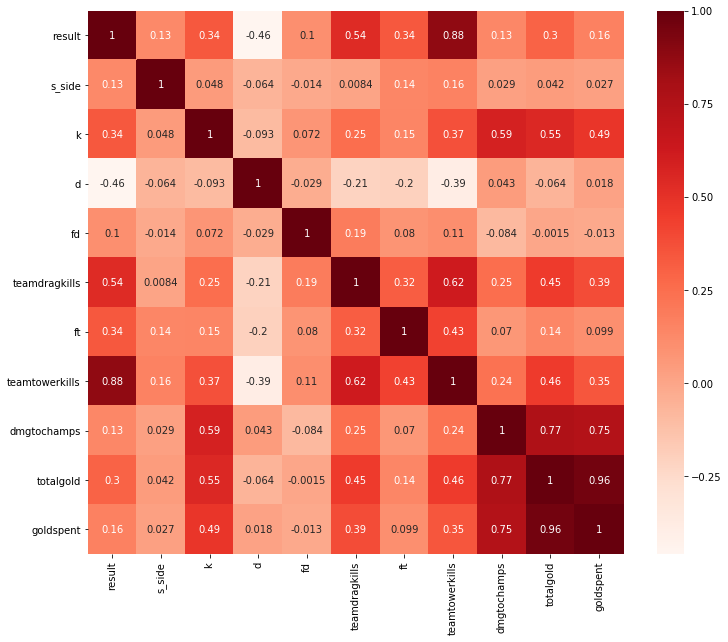

In [84]:
plt.figure(figsize=(12,10))
corr = lol_ML[fields_to_correlate].corr()
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()

<h3> Treinando as variáveis de interesse com o modelo escolhido:</h3>
<p> Aqui, finalmente as variáveis de interesse serão de fato treinadas com o modelo preditivo que se saiu melhor na fase anterior e sua acurácia será calculada logo depois. Isso será feito para todas as variáveis de interesse ao mesmo tempo, com o objetivo de prever as chances de vitória.</p>

In [85]:
probabilites_variables = np.array(s_lol_ML.iloc[:,1:])
target = np.array(s_lol_ML['result'])

In [86]:
'''
Aqui, de fato o dataset está sendo treinado de acordo com a divisão feita anteriormente feita 
anteriormente entre "features" e variáveis "alvo" (result). Existem vários modelos abaixo, mas somente
o modelo que se saiu melhor durante os testes do cross_validation_score ( melhor acurácia), será 
usado. Nesse caso, a variável s_side == Lado em que o time começou na partida (Azul ou Vermelho) será
treinada.
''' 
resultados = []
n_folds = 10
k_folds = KFold(n_folds, shuffle=True, random_state = 1)
scores_teste = 0
scores_treino = 0



for linhas_treino, linhas_teste in k_folds.split(probabilites_variables,target):
    XTreino, XTeste = probabilites_variables[linhas_treino], probabilites_variables[linhas_teste]
    yTreino, yTeste = target[linhas_treino], target[linhas_teste]
    
    # Aqui o melhor modelo será escolhido para treinar as variáveis.    
    #modelr = RandomForestClassifier(n_jobs = 4, n_estimators=10, random_state = 1)
    modelo = LogisticRegression(solver='liblinear', multi_class='ovr')
    #modeli = LinearDiscriminantAnalysis()
    #modelk = KNeighborsClassifier()
    #modeld = DecisionTreeClassifier()
    #modelg = GaussianNB()
    #models = SVC(gamma='auto')
    
    
    modelo.fit(XTreino, yTreino)
    previsoes = modelo.predict(XTeste)
    resultados.append(accuracy_score(yTeste, previsoes))
    scores_treino += modelo.score(XTreino, yTreino)
    scores_teste += modelo.score(XTeste, yTeste)
    

    
#Calcula a acurácia    
    
print("Acurácias de cada pedaço dividido pelo dataset =>")
print(resultados)
print("\nMédia de todas as acurácias: ", np.mean(resultados))
print()
print("Média da pontuação de validação do modelo de treino: ", scores_treino/n_folds)
print("Média da pontuação de validação do modelo de teste: ", scores_teste/n_folds)



Acurácias de cada pedaço dividido pelo dataset =>
[0.9655439411536972, 0.9589624467673248, 0.959349593495935, 0.9589624467673248, 0.962059620596206, 0.9632210607820364, 0.9562524196670538, 0.9523809523809523, 0.9558652729384437, 0.9550909794812233]

Média de todas as acurácias:  0.9587688734030199

Média da pontuação de validação do modelo de treino:  0.9592420527379877
Média da pontuação de validação do modelo de teste:  0.9587688734030199


In [87]:
'''
https://www.includehelp.com/ml-ai/root-mean-square%20error-rmse.aspx
Quanto menor o RMSE (Root-Mean-Square Error), melhor
'''

from sklearn.metrics import mean_squared_error
from math import sqrt

rss=((yTeste-previsoes)**2).sum()
mse=np.mean((yTeste-previsoes)**2)
print("Final Root-Mean-Square Error value is =",np.sqrt(np.mean((yTeste-previsoes)**2)))

Final Root-Mean-Square Error value is = 0.2119174851652799


In [88]:
#Testando variáveis de interesse com alto valor de influência na vitória
t_lol_ML = pd.concat([w_lol["result"], w_lol["k"],w_lol["teamdragkills"], w_lol["ft"], w_lol["teamtowerkills"] ], axis = 1)
t_lol_ML.head()

,result,k,teamdragkills,ft,teamtowerkills
0,0,0,0,1.0,4
1,0,0,0,1.0,4
2,0,0,0,1.0,4
3,0,0,0,1.0,4
4,0,3,0,1.0,4


In [89]:
Xt = np.array(t_lol_ML.iloc[:,1:])
yt = np.array(t_lol_ML['result'])

In [90]:
modelst = []
modelst.append(('RANDOM_FOREST_CLASSIFIER', RandomForestClassifier(n_estimators=10, random_state = 0)))
modelst.append(('LOGISTIC_REGRESSION', LogisticRegression(solver='liblinear', multi_class='ovr')))
modelst.append(('LINEAR_DISCRIMINATION_ANALISYS', LinearDiscriminantAnalysis()))
modelst.append(('KNEIGHBORS_CLASSIFIER', KNeighborsClassifier()))
modelst.append(('DECISION_TREE_CLASSIFIER', DecisionTreeClassifier()))
modelst.append(('GAUSSIANA', GaussianNB()))
#models.append(('SVM', SVC(gamma='auto')))



# evaluate each model in turn
resultst = []
namest = []
plota_namest = []
plota_acuraciat = []



for name, model in modelst:
    kft = KFold(10, shuffle=True, random_state = 1)
    hit_ratet = 0
    for training_linest, testing_linest in kft.split(Xt,yt):
       
        kft = model_selection.KFold(10, shuffle=True, random_state = 1)
        X_traint, X_testt = Xt[training_linest], Xt[testing_linest]
        y_traint, y_testt = yt[training_linest], yt[testing_linest]

        cv_resultst = cross_val_score(model, X_traint, y_traint, cv=kft, scoring='accuracy')
        resultst.append(cv_resultst)
        namest.append(name)

        print('%s => Accuracy: %f, Standard Deviation: (%f)' % (name, cv_resultst.mean(), cv_resultst.std()))

        hit_ratet += cv_resultst.mean()
        
    #plota_names.append(names)
    #plota_acuracia.append(hit_rate/10)

    final_accuracyt = hit_ratet/10   
    print("Média das 10 acurácias: ",final_accuracyt)
    #print("Desvio padrão da média final :",hit_rate.std())
    print()


RANDOM_FOREST_CLASSIFIER => Accuracy: 0.951004, Standard Deviation: (0.003738)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.950531, Standard Deviation: (0.005487)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.950144, Standard Deviation: (0.005279)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.951391, Standard Deviation: (0.005351)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.950617, Standard Deviation: (0.004887)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.950402, Standard Deviation: (0.004179)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.951908, Standard Deviation: (0.004208)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.951951, Standard Deviation: (0.003579)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.951048, Standard Deviation: (0.004324)
RANDOM_FOREST_CLASSIFIER => Accuracy: 0.951779, Standard Deviation: (0.002552)
Média das 10 acurácias:  0.951077489682231

LOGISTIC_REGRESSION => Accuracy: 0.948940, Standard Deviation: (0.004913)
LOGISTIC_REGRESSION => Accuracy: 0.949154, Standard Deviation: (0.004775)
LOGISTIC_REGRESSIO

In [91]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
# seed the random number generator
seed(1)
# generate univariate observations
#data = 5 * randn(100) + 50
# normality test
stat, p = shapiro(teste_lol)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

NameError: name 'teste_lol' is not defined

In [ ]:
lol_ML.shape

In [ ]:
teste_lol = lol_ML.drop('champion', 1)

In [ ]:
teste_lol.shape

In [ ]:
# histogram plot
from numpy.random import seed
from numpy.random import randn
from matplotlib import pyplot
# seed the random number generator
seed(1)
# generate univariate observations
#data = 5 * randn(100) + 50
# histogram plot
pyplot.hist(teste_lol)
pyplot.show()

In [ ]:
'''
Aqui, de fato o dataset está sendo treinado de acordo com a divisão feita anteriormente feita 
anteriormente entre "features" e variáveis "alvo" (result). Existem vários modelos abaixo, mas somente
o modelo que se saiu melhor durante os testes do cross_validation_score ( melhor acurácia), será 
usado. Nesse caso, a variável s_side == Lado em que o time começou na partida (Azul ou Vermelho) será
treinada.






models = []
models.append(('RANDOM_FOREST_CLASSIFIER', RandomForestClassifier(n_estimators=10, random_state = 0)))
models.append(('LOGISTIC_REGRESSION', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LINEAR_DISCRIMINATION_ANALISYS', LinearDiscriminantAnalysis()))
models.append(('KNEIGHBORS_CLASSIFIER', KNeighborsClassifier()))
models.append(('DECISION_TREE_CLASSIFIER', DecisionTreeClassifier()))
models.append(('GAUSSIANA', GaussianNB()))
#models.append(('SVM', SVC(gamma='auto')))



# evaluate each model in turn
resultados = []
names = []
hit_rate = 0


for name, model in models:
    k_folds = KFold(10, shuffle=True, random_state = 1)
    hit_rate = 0
    for linhas_treino, linhas_teste in k_folds.split(probabilites_variables,target):
        XTreino, XTeste = probabilites_variables[linhas_treino], probabilites_variables[linhas_teste]
        yTreino, yTeste = target[linhas_treino], target[linhas_teste]
        
        model.fit(XTreino, yTreino)
        previsoes = modelo.predict(XTeste)
        resultados.append(accuracy_score(yTeste, previsoes))
        
        print('%s => Accuracy: %f, Standard Deviation: (%f)' % (name, np.mean(resultados), np.std(resultados)))
        
        hit_rate += np.mean(resultados)
        
    #accuracy_mean1 = np.mean(results1)
    print("Média das 10 acurácias: ",hit_rate/10)
    print()
    #accuracy_mean1 = np.mean(results1)
    #print("Média das 10 acurácias: ",hit_rate/10)
    #print()
'''

In [ ]:
'''
Aqui, de fato o dataset está sendo treinado de acordo com a divisão feita anteriormente feita 
anteriormente entre "features" e variáveis "alvo" (result). Existem vários modelos abaixo, mas somente
o modelo que se saiu melhor durante os testes do cross_validation_score ( melhor acurácia), será 
usado. Nesse caso, a variável s_side == Lado em que o time começou na partida (Azul ou Vermelho) será
treinada.

results_1 = []

for training_lines_1, testing_lines_1 in kf1.split(X1,y1):
    X1train, X1test = X1[training_lines_1], X1[testing_lines_1]
    y1train, y1test = y1[training_lines_1], y1[testing_lines_1]
    
    # Aqui o melhor modelo será escolhido para treinar as variáveis.    
    modelr = RandomForestClassifier(n_jobs = 4, n_estimators=10, random_state = 1)
    #modelo = LogisticRegression(solver='liblinear', multi_class='ovr')
    #modeli = LinearDiscriminantAnalysis()
    #modelk = KNeighborsClassifier()
    #modeld = DecisionTreeClassifier()
    #modelg = GaussianNB()
    #models = SVC(gamma='auto')
    
    
    modelr.fit(X1train, y1train)
    predictions_1 = modelr.predict(X1test)
    results_1.append(accuracy_score(y1test, predictions_1))
    
#Calcula a acurácia    
    
print("Acurácias de cada pedaço dividido pelo dataset =>")
print(results_1)
print("\nMédia de todas as acurácias: ", np.mean(results_1))

''' 